In [276]:
import pandas as pd
import datetime
from os import listdir
import os, os.path
from os.path import isfile, join
import numpy as np
import csv
import re
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
from pm4py.objects.log.util import dataframe_utils
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import networkx as nx

In [277]:
df_prueba = pd.read_csv("logCT2.csv",index_col=0)

reports = pd.read_excel("./Reports BPI Challenge.xlsx")
reports['BPI Challenge'] = reports['BPI Challenge'].fillna(method='pad')

reports['BPI Challenge'] = reports['BPI Challenge'].astype(int)
reports["BPI Challenge"]=reports["BPI Challenge"].apply(str)

reports["Unnamed: 1"]=reports["Unnamed: 1"].apply(str)
reports['Tupla'] = reports['Unnamed: 1'] + reports["BPI Challenge"]

df_prueba["Year"]=df_prueba["Year"].apply(str)
df_prueba['Tupla'] = df_prueba['Report'] + df_prueba["Year"]

sLength = len(df_prueba['Tupla'])
df_prueba['Organization'] = pd.Series(np.random.randn(sLength), index=df_prueba.index)

df_prueba['prueba']= ""
df_prueba.drop(['Organization', 'prueba'], axis=1)

case:concept:name               concept:name  \
0      A1 P2 BPI 2020       Calculate cycle time   
1      A1 P2 BPI 2020         Compare cycle time   
2      A2 P2 BPI 2020       Calculate cycle time   
3      A2 P2 BPI 2020         Compare cycle time   
4      A7 P2 BPI 2020       Calculate throughput   
..                ...                        ...   
943   A19 P1 BPI 2020               Group traces   
944   A19 P1 BPI 2020               Group traces   
945   A19 P1 BPI 2020       Calculate statistics   
946   A19 P1 BPI 2020       Calculate throughput   
947   A19 P1 BPI 2020  Represent temporal series   

                                    Specific operation  \
0    Calculate cycle time of the whole process for ...   
1                                                        
2            Get cycle time from the previous question   
3                                                        
4                                                        
..                                                 ...   
943                               Group traces by year   
944                         Group traces by activities   
945                 Calculate Statistics of activities   
946                                                      
947            Represent temporal series of throughput   

                 time:timestamp Report Question  Year      Category  \
0    2021-10-19 12:47:13.651481     A1       P2  2020      Academic   
1    2021-10-19 12:47:13.659459     A1       P2  2020      Academic   
2    2021-10-19 12:47:13.666495     A2       P2  2020       Student   
3    2021-10-19 12:47:13.666495     A2       P2  2020       Student   
4    2021-10-19 12:47:13.682150     A7       P2  2020      Academic   
..                          ...    ...      ...   ...           ...   
943  2021-10-19 12:47:20.534786    A19       P1  2020  Professional   
944  2021-10-19 12:47:20.534786    A19       P1  2020  Professional   
945  2021-10-19 12:47:20.557196    A19       P1  2020  Professional   
946  2021-10-19 12:47:20.567144    A19       P1  2020  Professional   
947  2021-10-19 12:47:20.576118    A19       P1  2020  Professional   

                     Type    Tupla  
0      Analyze Cycle Time   A12020  
1      Analyze Cycle Time   A12020  
2      Analyze Cycle Time   A22020  
3      Analyze Cycle Time   A22020  
4      Analyze Cycle Time   A72020  
..                    ...      ...  
943          Manipulation  A192020  
944          Manipulation  A192020  
945  Calculate statistics  A192020  
946    Analyze Cycle Time  A192020  
947        Representation  A192020  

[948 rows x 10 columns]

In [278]:
# lista=[]
df_prueba['Organization'] = ""
for d in range(len(df_prueba)):
    for r in range(len(reports)):
        if(df_prueba.loc[d]['Tupla'] == reports.loc[r]['Tupla']):
#             print('si')
#             print(reports.iloc[r]['Universidad/Organización'])
#             lista.append(reports.loc[r]['Universidad/Organización'])
             df_prueba.iloc[d]['Organization'] = reports.loc[r]['Universidad/Organización']
    
df_prueba.drop(['prueba'], axis=1)

case:concept:name               concept:name  \
0      A1 P2 BPI 2020       Calculate cycle time   
1      A1 P2 BPI 2020         Compare cycle time   
2      A2 P2 BPI 2020       Calculate cycle time   
3      A2 P2 BPI 2020         Compare cycle time   
4      A7 P2 BPI 2020       Calculate throughput   
..                ...                        ...   
943   A19 P1 BPI 2020               Group traces   
944   A19 P1 BPI 2020               Group traces   
945   A19 P1 BPI 2020       Calculate statistics   
946   A19 P1 BPI 2020       Calculate throughput   
947   A19 P1 BPI 2020  Represent temporal series   

                                    Specific operation  \
0    Calculate cycle time of the whole process for ...   
1                                                        
2            Get cycle time from the previous question   
3                                                        
4                                                        
..                                                 ...   
943                               Group traces by year   
944                         Group traces by activities   
945                 Calculate Statistics of activities   
946                                                      
947            Represent temporal series of throughput   

                 time:timestamp Report Question  Year      Category  \
0    2021-10-19 12:47:13.651481     A1       P2  2020      Academic   
1    2021-10-19 12:47:13.659459     A1       P2  2020      Academic   
2    2021-10-19 12:47:13.666495     A2       P2  2020       Student   
3    2021-10-19 12:47:13.666495     A2       P2  2020       Student   
4    2021-10-19 12:47:13.682150     A7       P2  2020      Academic   
..                          ...    ...      ...   ...           ...   
943  2021-10-19 12:47:20.534786    A19       P1  2020  Professional   
944  2021-10-19 12:47:20.534786    A19       P1  2020  Professional   
945  2021-10-19 12:47:20.557196    A19       P1  2020  Professional   
946  2021-10-19 12:47:20.567144    A19       P1  2020  Professional   
947  2021-10-19 12:47:20.576118    A19       P1  2020  Professional   

                     Type    Tupla  \
0      Analyze Cycle Time   A12020   
1      Analyze Cycle Time   A12020   
2      Analyze Cycle Time   A22020   
3      Analyze Cycle Time   A22020   
4      Analyze Cycle Time   A72020   
..                    ...      ...   
943          Manipulation  A192020   
944          Manipulation  A192020   
945  Calculate statistics  A192020   
946    Analyze Cycle Time  A192020   
947        Representation  A192020   

                                          Organization  
0                       Technische Universität, Berlin  
1                       Technische Universität, Berlin  
2               Faculty of Science, Utrecht University  
3               Faculty of Science, Utrecht University  
4    German Research Center for Artificial Intellig...  
..                                                 ...  
943                                           Sberbank  
944                                           Sberbank  
945                                           Sberbank  
946                                           Sberbank  
947                                           Sberbank  

[948 rows x 11 columns]

In [279]:
df_report_year = df_prueba.groupby(by=['Question', 'Year'])
for name, group in df_report_year:
    operations = group['concept:name'].to_list()

In [280]:
df_prueba['Q'] = df_prueba['Year'] + " - " + df_prueba['Question']

In [281]:
df_prueba.loc[df_prueba['Specific operation']==" ", 'Specific operation'] = df_prueba['concept:name']

In [282]:
operations = df_prueba['concept:name'].unique()
df_prueba['case:concept:name'].nunique()

126

In [283]:
compare_ops = [o for o in operations if o.startswith('Comp')]

In [284]:
num_cases = df_prueba['case:concept:name'].nunique()
def distribution(condition):
    df_prueba['cond'] = condition
    summary = df_prueba.groupby('case:concept:name').agg({'Q': 'first', 'Year': 'first', 'Category': 'first', 'cond':'sum'})
    summary['exists'] = summary['cond']>0
    print_exists(summary)
    print(summary['cond'].value_counts())

def distribution_2(cond1, cond2):
    df_prueba['cond'] = cond1
    df_prueba['cond2'] = cond2
    summary = df_prueba.groupby('case:concept:name').agg({'Q': 'first', 'Year': 'first', 'Category': 'first', 'cond':'sum', 'cond2':'sum'})
    summary['exists'] = ((summary['cond']>0) & (summary['cond2']>0))
    print_exists(summary)
    print("cond -> cond2", ((summary['cond'] == 0) | (summary['cond2']>0)).value_counts())
    print('cond2 -> cond', ((summary['cond2'] == 0) | (summary['cond']>0)).value_counts())


def distribution_set(variants):
    for v in variants:
        df_prueba['cond_'+v] = df_prueba['Specific operation']==v

    choice = { 'cond_'+v: 'sum' for v in variants }
    choice.update({'Q': 'first', 'Year': 'first', 'Category': 'first'})
    summary = df_prueba.groupby('case:concept:name').agg(choice)
    for v in variants:
        summary['exists_'+v] = summary['cond_'+v]>0

    return summary

def print_exists(summary, cols='exists'):
    print('cases:')
    print(summary[cols].agg(['sum', 'mean']))

    print(summary.groupby('Year')[cols].mean())
    print(summary.groupby('Q')[cols].mean())
    print(summary.groupby('Category')[cols].mean())
    print(summary.groupby(['Category','Q'])[cols].agg(['mean','count']))


    

In [285]:
df_prueba['cond'] = df_prueba['concept:name'].isin(compare_ops)
summary = df_prueba.groupby('case:concept:name').agg({'Q': 'first', 'Year': 'first', 'Category': 'first', 'cond':'sum'})
summary['exists'] = summary['cond']>0

summary.groupby('Year')['exists'].mean()
summary.groupby('Q')['exists'].mean()
summary.groupby('Category')['exists'].mean()
summary.groupby(['Category','Q'])['exists'].agg(['mean','count'])
summary['cond'].value_counts()

0    96
1    27
3     2
2     1
Name: cond, dtype: int64

In [286]:
# How are comparison operations used?
distribution(df_prueba['concept:name'].isin(compare_ops))

cases:
sum     30.000000
mean     0.238095
Name: exists, dtype: float64
Year
2015    0.555556
2017    0.142857
2019    0.166667
2020    0.238095
Name: exists, dtype: float64
Q
2015 - P5    0.555556
2017 - P1    0.142857
2019 - P2    0.166667
2020 - P1    0.210526
2020 - P2    0.722222
2020 - P4    0.058824
2020 - P5    0.058824
2020 - P6    0.076923
Name: exists, dtype: float64
Category
Academic        0.18750
Professional    0.28125
Student         0.20000
Name: exists, dtype: float64
                            mean  count
Category     Q                         
Academic     2015 - P5  0.750000      4
             2017 - P1  0.000000      2
             2019 - P2  0.000000      2
             2020 - P1  0.000000      6
             2020 - P2  0.600000      5
             2020 - P4  0.000000      3
             2020 - P5  0.000000      6
             2020 - P6  0.000000      4
Professional 2015 - P5  0.333333      3
             2017 - P1  0.333333      6
             2019 - P2  0.200

In [287]:
# How are representation operations used?
represent_ops = [o for o in operations if o.startswith('Represent')]
distribution(df_prueba['concept:name'].isin(represent_ops))


cases:
sum     75.000000
mean     0.595238
Name: exists, dtype: float64
Year
2015    0.666667
2017    0.714286
2019    0.833333
2020    0.523810
Name: exists, dtype: float64
Q
2015 - P5    0.666667
2017 - P1    0.714286
2019 - P2    0.833333
2020 - P1    0.631579
2020 - P2    0.388889
2020 - P4    0.647059
2020 - P5    0.529412
2020 - P6    0.384615
Name: exists, dtype: float64
Category
Academic        0.437500
Professional    0.609375
Student         0.733333
Name: exists, dtype: float64
                            mean  count
Category     Q                         
Academic     2015 - P5  0.750000      4
             2017 - P1  0.500000      2
             2019 - P2  0.500000      2
             2020 - P1  0.500000      6
             2020 - P2  0.400000      5
             2020 - P4  1.000000      3
             2020 - P5  0.166667      6
             2020 - P6  0.000000      4
Professional 2015 - P5  0.666667      3
             2017 - P1  0.666667      6
             2019 - P2  0.

In [288]:
# Cases with both comparison and representation
distribution_2(df_prueba['concept:name'].isin(represent_ops), df_prueba['concept:name'].isin(compare_ops))

cases:
sum     16.000000
mean     0.126984
Name: exists, dtype: float64
Year
2015    0.222222
2017    0.142857
2019    0.166667
2020    0.107143
Name: exists, dtype: float64
Q
2015 - P5    0.222222
2017 - P1    0.142857
2019 - P2    0.166667
2020 - P1    0.157895
2020 - P2    0.277778
2020 - P4    0.058824
2020 - P5    0.000000
2020 - P6    0.000000
Name: exists, dtype: float64
Category
Academic        0.125000
Professional    0.140625
Student         0.100000
Name: exists, dtype: float64
                            mean  count
Category     Q                         
Academic     2015 - P5  0.500000      4
             2017 - P1  0.000000      2
             2019 - P2  0.000000      2
             2020 - P1  0.000000      6
             2020 - P2  0.400000      5
             2020 - P4  0.000000      3
             2020 - P5  0.000000      6
             2020 - P6  0.000000      4
Professional 2015 - P5  0.000000      3
             2017 - P1  0.333333      6
             2019 - P2  0.

In [289]:
df_prueba[df_prueba['concept:name'] == "Calculate cycle time"]['Specific operation'].unique()

array(['Calculate cycle time of the whole process for all traces',
       'Get cycle time from the previous question',
       'Calculate cycle time of only a subset of pairs of events for all traces',
       'Calculate cycle time of a fragment of the process for all traces',
       'Calculate cycle time for all pairs of events for each subset of traces',
       'Calculate cycle time for all pairs of events for all traces',
       'Calculate cycle time of a fragment of the process for each subset of traces',
       'Calculate cycle time of only a subset of pairs of events for a subset of traces',
       'Calculate cycle time of the whole process for a subset of traces',
       'Calculate cycle time of a fragment of the process for a subset of traces',
       'Calculate cycle time of the whole process for each subset of traces',
       'Calculate cycle time of only a subset of pairs of events for each subset of traces',
       'Calculate cycle time for all pairs of events for a subset of

In [290]:
time_analysis_ops = ['Calculate cycle time', 'Identify bottlenecks', 'Calculate waiting time', 'Calculate throughput', 'Calculate processing time']
[o for o in operations if o in time_analysis_ops]

distribution(df_prueba['concept:name'].isin(time_analysis_ops))


cases:
sum     113.000000
mean      0.896825
Name: exists, dtype: float64
Year
2015    1.000000
2017    1.000000
2019    1.000000
2020    0.845238
Name: exists, dtype: float64
Q
2015 - P5    1.000000
2017 - P1    1.000000
2019 - P2    1.000000
2020 - P1    0.894737
2020 - P2    0.666667
2020 - P4    0.764706
2020 - P5    0.941176
2020 - P6    1.000000
Name: exists, dtype: float64
Category
Academic        0.875000
Professional    0.859375
Student         1.000000
Name: exists, dtype: float64
                            mean  count
Category     Q                         
Academic     2015 - P5  1.000000      4
             2017 - P1  1.000000      2
             2019 - P2  1.000000      2
             2020 - P1  0.666667      6
             2020 - P2  0.600000      5
             2020 - P4  1.000000      3
             2020 - P5  1.000000      6
             2020 - P6  1.000000      4
Professional 2015 - P5  1.000000      3
             2017 - P1  1.000000      6
             2019 - P2  

In [291]:
distribution(df_prueba['concept:name'].isin(['Calculate waiting time', 'Calculate processing time']))


cases:
sum     18.000000
mean     0.142857
Name: exists, dtype: float64
Year
2015    0.000000
2017    0.666667
2019    0.166667
2020    0.023810
Name: exists, dtype: float64
Q
2015 - P5    0.000000
2017 - P1    0.666667
2019 - P2    0.166667
2020 - P1    0.105263
2020 - P2    0.000000
2020 - P4    0.000000
2020 - P5    0.000000
2020 - P6    0.000000
Name: exists, dtype: float64
Category
Academic        0.031250
Professional    0.109375
Student         0.333333
Name: exists, dtype: float64
                            mean  count
Category     Q                         
Academic     2015 - P5  0.000000      4
             2017 - P1  0.500000      2
             2019 - P2  0.000000      2
             2020 - P1  0.000000      6
             2020 - P2  0.000000      5
             2020 - P4  0.000000      3
             2020 - P5  0.000000      6
             2020 - P6  0.000000      4
Professional 2015 - P5  0.000000      3
             2017 - P1  0.666667      6
             2019 - P2  0.

In [467]:
specific = df_prueba[['concept:name', 'Specific operation', 'Type']].drop_duplicates()
specific

concept:name  \
0         Calculate cycle time   
1           Compare cycle time   
2         Calculate cycle time   
4         Calculate throughput   
5    Comparative of throughput   
..                         ...   
893             Identify roles   
896        Identify activities   
933       Identify bottlenecks   
945       Calculate statistics   
947  Represent temporal series   

                                    Specific operation                  Type  
0    Calculate cycle time of the whole process for ...    Analyze Cycle Time  
1                                   Compare cycle time    Analyze Cycle Time  
2            Get cycle time from the previous question    Analyze Cycle Time  
4                                 Calculate throughput    Analyze Cycle Time  
5                            Comparative of throughput    Analyze Cycle Time  
..                                                 ...                   ...  
893             Identify roles by organizational units        Identification  
896                    Identify activities with traces        Identification  
933  Identify activities as bottlenecks applying te...    Analyze Cycle Time  
945                 Calculate Statistics of activities  Calculate statistics  
947            Represent temporal series of throughput        Representation  

[139 rows x 3 columns]

# Length and different operations

count    126.000000
mean       7.523810
std        7.643784
min        1.000000
25%        3.000000
50%        5.000000
75%       10.000000
max       56.000000
dtype: float64
count    126.000000
mean       5.547619
std        4.101916
min        1.000000
25%        3.000000
50%        4.000000
75%        7.750000
max       21.000000
dtype: float64
              count      mean       std  min   25%  50%    75%   max
Category                                                            
Academic       32.0  5.593750  5.123377  1.0  2.75  4.0   6.00  27.0
Professional   64.0  7.718750  8.473055  1.0  3.00  5.0  10.00  56.0
Student        30.0  9.166667  7.799573  1.0  3.00  7.0  10.75  30.0
              count      mean       std  min   25%  50%  75%   max
Category                                                          
Academic       32.0  4.250000  2.828427  1.0  2.75  3.5  5.0  14.0
Professional   64.0  5.515625  4.097975  1.0  2.75  4.0  8.0  20.0
Student        30.0  7.000000  4.8423

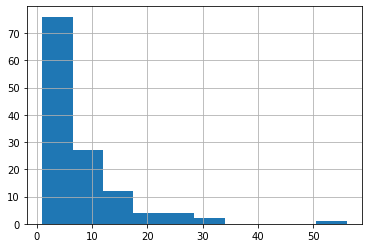

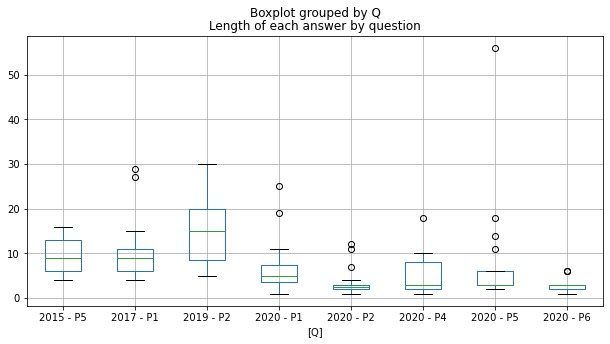

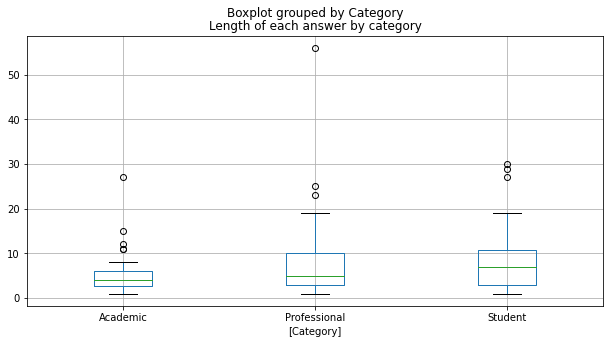

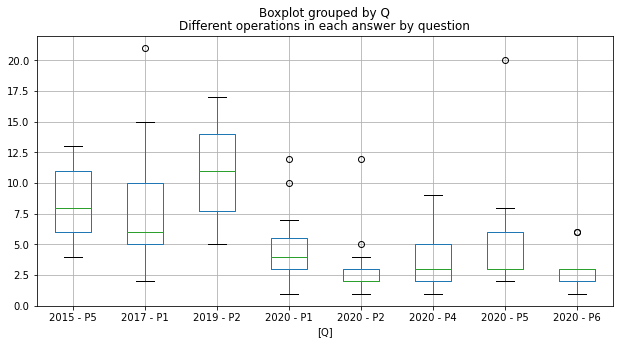

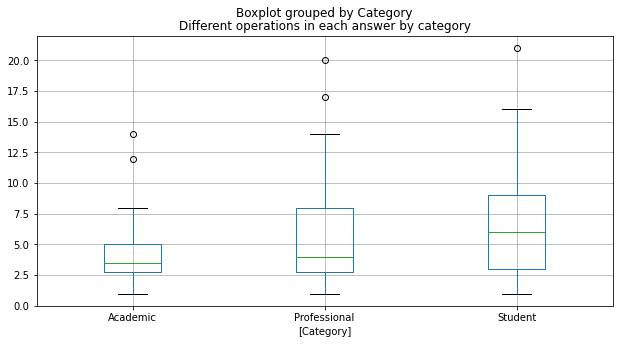

In [552]:
full_operations = specific['Specific operation'].unique()
s_full = distribution_set(full_operations)

# Length of each answer
s_full[['cond_'+s for s in full_operations]].sum(axis=1).hist()
print(s_full[['cond_'+s for s in full_operations]].sum(axis=1).describe())
print(s_full[['exists_'+s for s in full_operations]].sum(axis=1).describe())

print(s_full[['cond_'+s for s in full_operations]].sum(axis=1).groupby(s_full['Category']).describe())
print(s_full[['exists_'+s for s in full_operations]].sum(axis=1).groupby(s_full['Category']).describe())

# Length of each answer by question
pd.concat([s_full[['cond_'+s for s in full_operations]].sum(axis=1), s_full['Q']], axis=1).boxplot(by='Q', figsize=(10,5)).title.set_text('Length of each answer by question')

# Length of each answer by category
pd.concat([s_full[['cond_'+s for s in full_operations]].sum(axis=1), s_full['Category']], axis=1).boxplot(by='Category', figsize=(10,5)).title.set_text('Length of each answer by category')

# Different operations of each answer by question
pd.concat([s_full[['exists_'+s for s in full_operations]].sum(axis=1), s_full['Q']], axis=1).boxplot(by='Q', figsize=(10,5)).title.set_text('Different operations in each answer by question')

# Different operations of each answer by category
pd.concat([s_full[['exists_'+s for s in full_operations]].sum(axis=1), s_full['Category']], axis=1).boxplot(by='Category', figsize=(10,5)).title.set_text('Different operations in each answer by category')

# Calculate cycle time focus

In [534]:
def analysis_ops(ops):

    def sum_analysis(ds, title):
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 7))
        ds.hist(ax=ax1)

        # Number of different ops per analysis by question
        pd.concat([ds, summ['Q']], axis=1).boxplot(by='Q', ax=ax2)
        fig.suptitle(title)
        

    def show_values_on_bars(axs):
        def _show_on_single_plot(ax):        
            for p in ax.patches:
                _x = p.get_x() + p.get_width()
                _y = p.get_y() + p.get_height() / 2
                value = '{:.2f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="center") 

        if isinstance(axs, np.ndarray):
            for idx, ax in np.ndenumerate(axs):
                _show_on_single_plot(ax)
        else:
            _show_on_single_plot(axs)

    summ = distribution_set(ops)
    exists_ops_column = ['exists_'+s for s in ops]
    cond_ops_column = ['cond_' + s for s in ops]

    # Number of different ops per analysis
    different_ops = summ[exists_ops_column].sum(axis=1)
    sum_analysis(different_ops, 'Number of different ops of the type used')
    print('mean of diff ops', different_ops.describe())
    print(different_ops.groupby(summ['Q']).describe())

    total_ops = summ[cond_ops_column].sum(axis=1)
    sum_analysis(total_ops, 'Number of total ops of the type used')
    print('mean of total ops', total_ops.describe())
    print(total_ops.groupby(summ['Q']).describe())

    fig, (ax0a, ax0b) = plt.subplots(2, figsize=(10,20))
    
    summ[exists_ops_column].transpose().sort_index(ascending=False).mean(axis=1).plot(kind='barh', ax=ax0a)
    summ[cond_ops_column].transpose().sort_index(ascending=False).mean(axis=1).plot(kind='barh', ax=ax0b)
    show_values_on_bars(ax0a)
    ax0a.title.set_text('Mean of different ops used')
    show_values_on_bars(ax0b)
    ax0b.title.set_text('Mean of total ops used')

    # Frequency of each op by question
    exists_ops_q = pd.concat([summ[exists_ops_column], summ['Q']], axis=1)
    #ar = exists_ops_column.append('Q')
    fig, (ax3) = plt.subplots(nrows=1, figsize=(10, 10))
    sns.heatmap(exists_ops_q.replace(0, np.NaN).pivot_table(columns='Q', aggfunc=np.sum).sort_index(),cmap="YlGnBu", ax=ax3)
    fig.suptitle('Number of different analysis with each op by question')

    fig, (ax3a, ax3b) = plt.subplots(nrows=2, figsize=(10,15))
    summ[exists_ops_column].transpose().sort_index(ascending=False).sum(axis=1).plot(kind='barh', ax=ax3a)
    show_values_on_bars(ax3a)
    ax3a.title.set_text('Frequency of different ops')
    summ[cond_ops_column].transpose().sort_index(ascending=False).sum(axis=1).plot(kind='barh', ax=ax3b)
    show_values_on_bars(ax3b)
    ax3b.title.set_text('Frequency of ops')

    # Average of each op by question
    total_ops_q = pd.concat([summ[cond_ops_column], summ['Q']], axis=1)
    #ar = cond_ops_column.append('Q')
    fig, (ax4, ax5) = plt.subplots(nrows=2, figsize=(10, 30))
    sns.heatmap(total_ops_q.replace(0, np.NaN).pivot_table(columns='Q', aggfunc=np.mean).sort_index(),cmap="YlGnBu", ax=ax4)
    fig.suptitle('Average of each op by question')

    # Number of different cycle time ops per analysis by question
    #pd.concat([s_cycle_time[['cond_'+s for s in cycle_time_ops]].sum(axis=1), s_cycle_time['Q']], axis=1).boxplot(by='Q', figsize=(10,5))
    s_cycle_time_an = summ.sort_values('Q')[cond_ops_column]
    s_cycle_time_an.sum(axis=1).groupby(summ['Q']).value_counts().sort_index()
    sns.heatmap(s_cycle_time_an.transpose().sort_index(),cmap="YlGnBu", ax = ax5, xticklabels=1, yticklabels=1)

    print(different_ops.groupby(summ['Q']).value_counts().sort_index())

    return summ
    
def variants(summ, ops, v_type='cond_'):
    cols = [v_type+s for s in ops]
    print(cols)
    more_than_one = summ[cols].sum(axis=1) > 1
    return pd.concat([(summ.loc[:,cols].apply(lambda x: ",".join([str(v) for v in x.values]), axis=1)), summ['Q']], axis=1).reset_index().groupby(0).agg(['count', lambda x: set(x)])

mean of diff ops count    126.000000
mean       1.071429
std        0.868825
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        4.000000
dtype: float64
           count      mean       std  min  25%  50%   75%  max
Q                                                             
2015 - P5    9.0  1.444444  0.527046  1.0  1.0  1.0  2.00  2.0
2017 - P1   21.0  1.285714  1.189237  0.0  0.0  1.0  2.00  4.0
2019 - P2   12.0  1.916667  0.996205  1.0  1.0  2.0  2.25  4.0
2020 - P1   19.0  1.000000  0.816497  0.0  0.5  1.0  1.00  3.0
2020 - P2   18.0  0.611111  0.607685  0.0  0.0  1.0  1.00  2.0
2020 - P4   17.0  0.941176  0.899346  0.0  0.0  1.0  1.00  3.0
2020 - P5   17.0  0.882353  0.485071  0.0  1.0  1.0  1.00  2.0
2020 - P6   13.0  0.846154  0.375534  0.0  1.0  1.0  1.00  1.0
mean of total ops count    126.000000
mean       1.246032
std        1.204568
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        7.000000


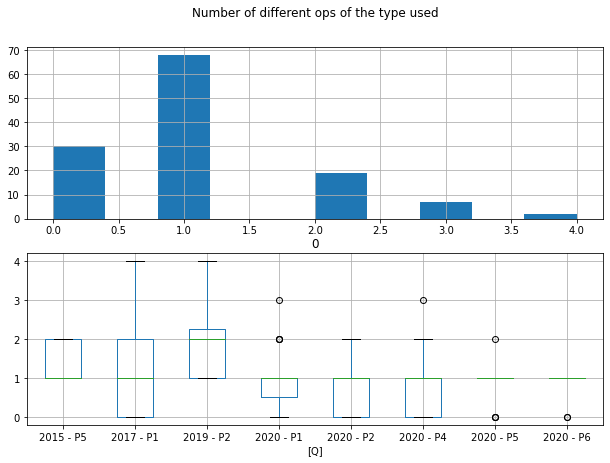

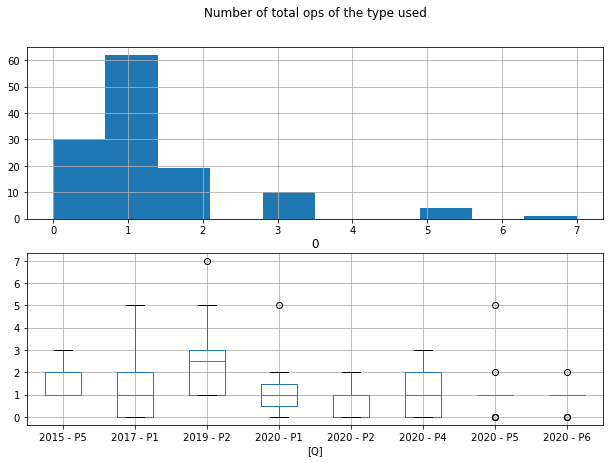

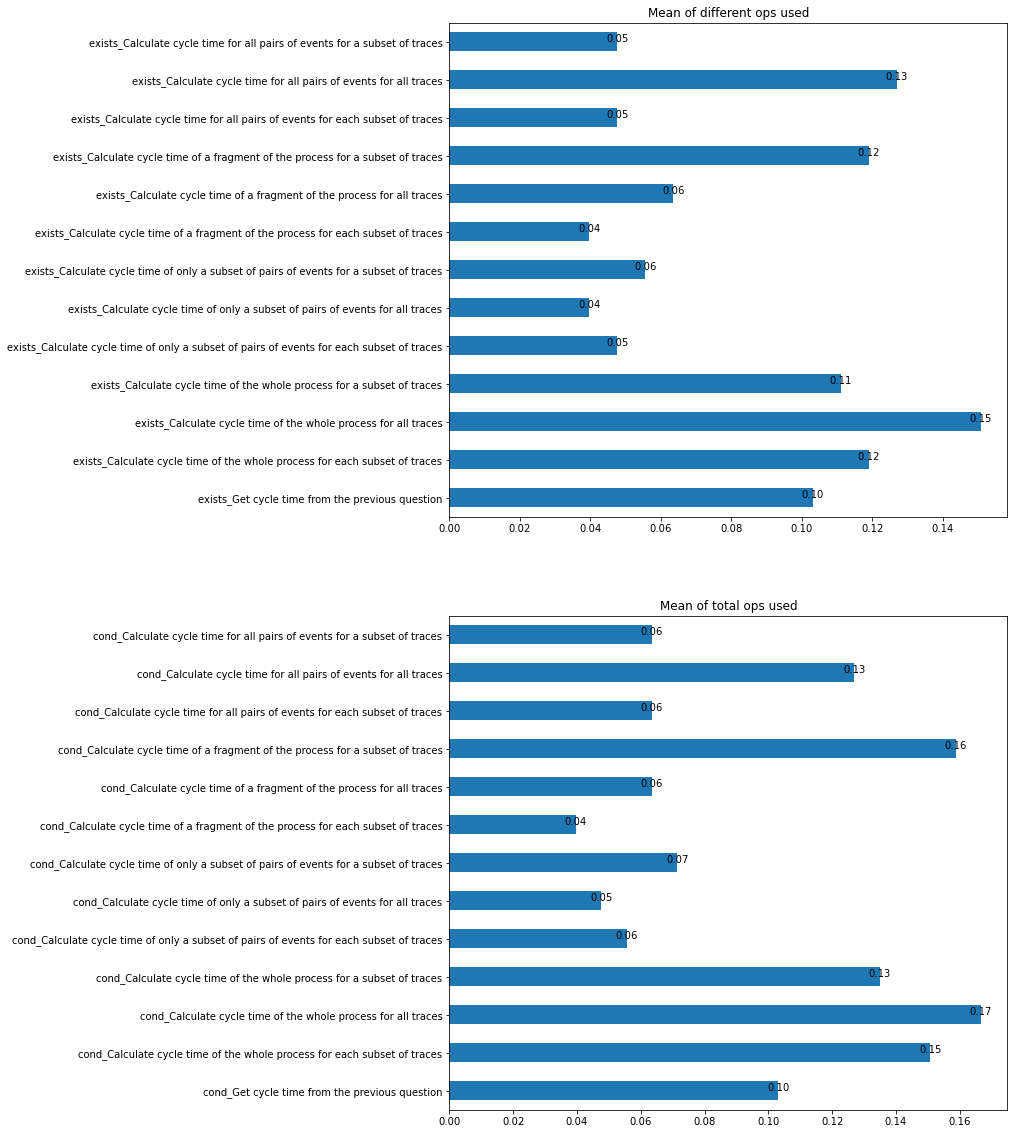

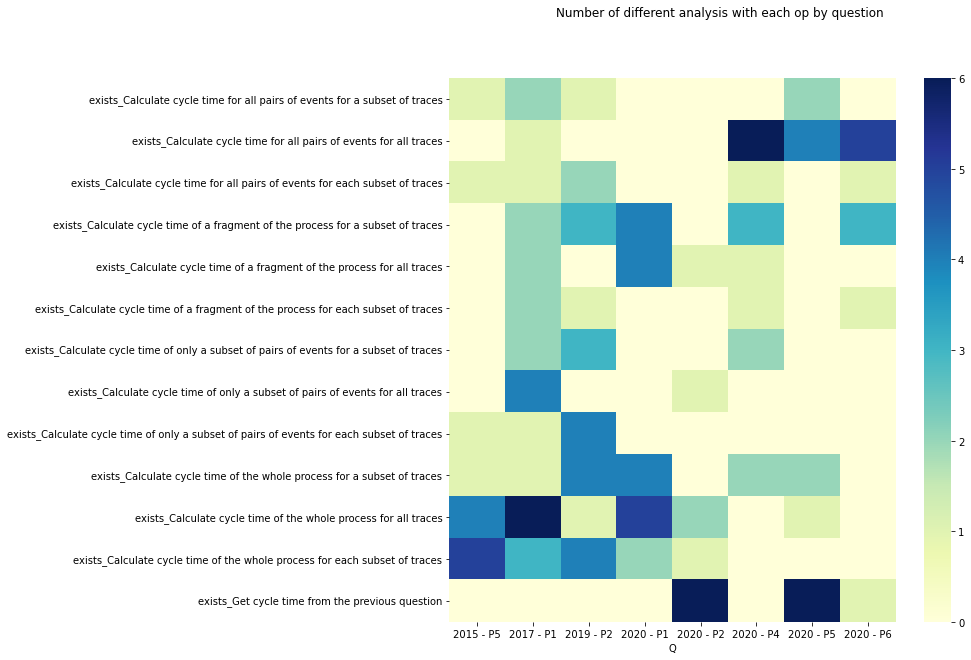

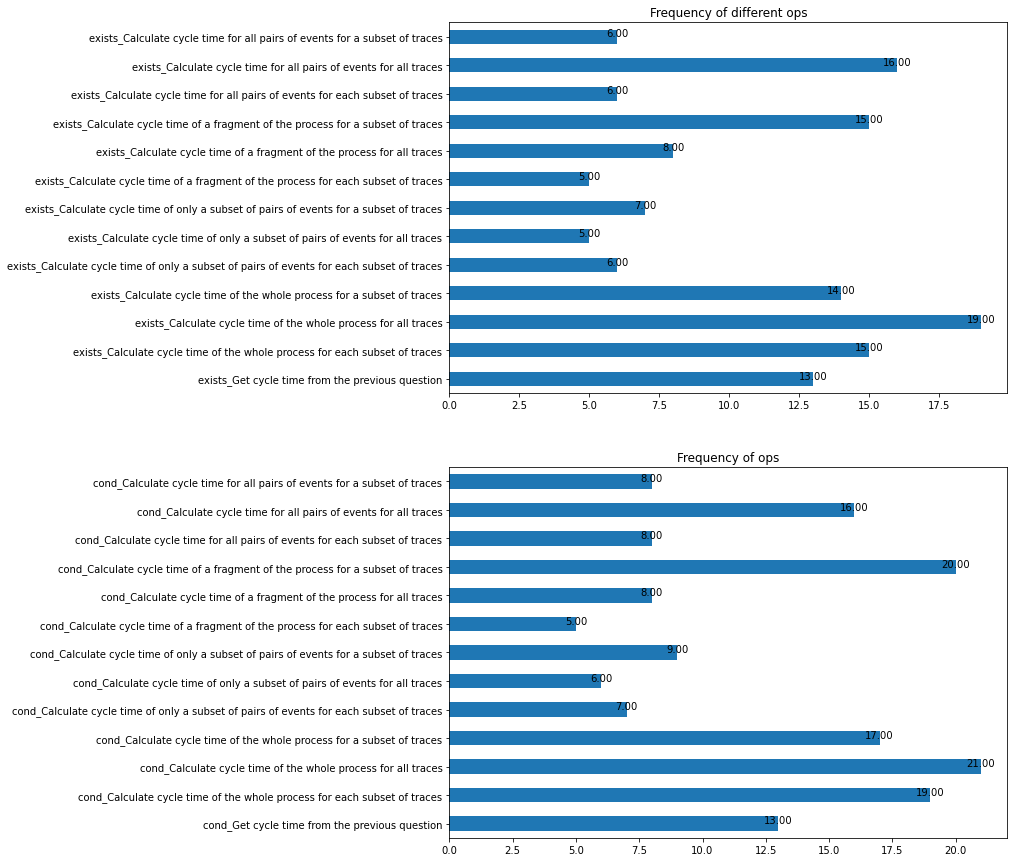

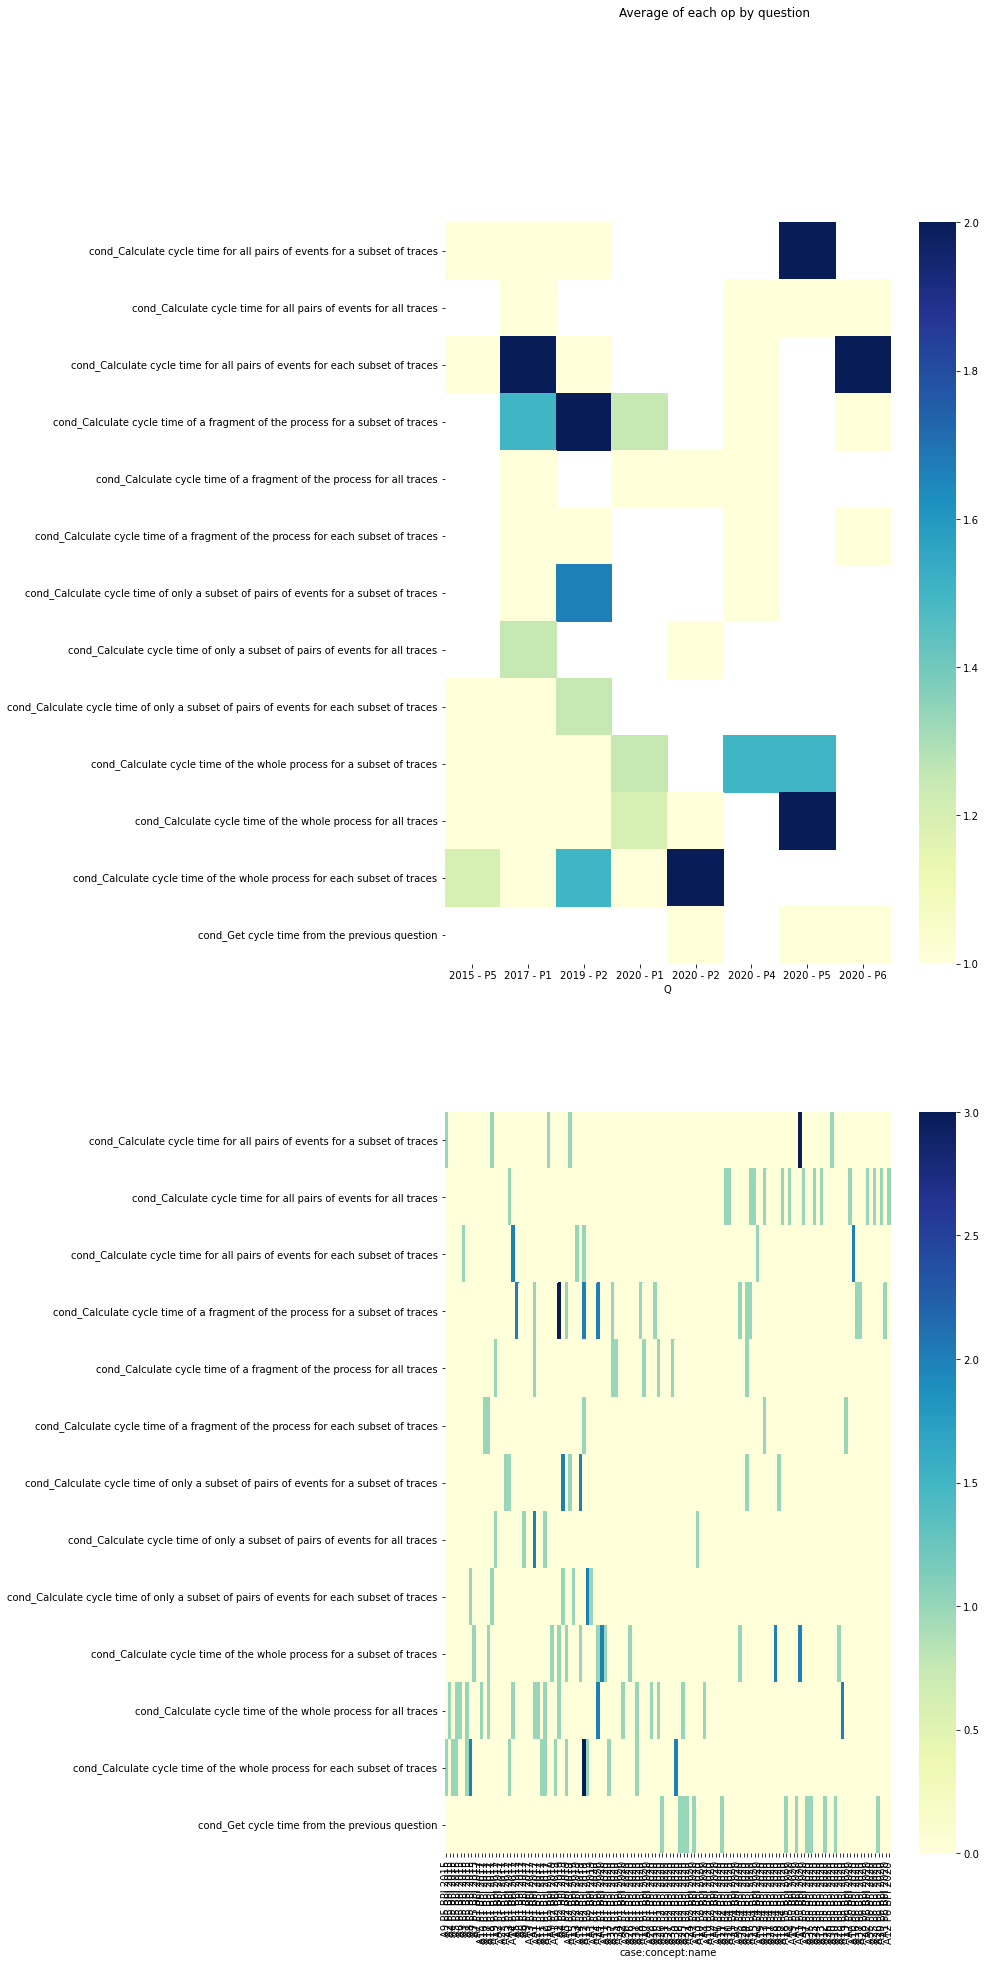

In [535]:
cycle_time_ops = specific[specific['concept:name']=='Calculate cycle time']['Specific operation'].unique()
s_cycle_time = analysis_ops(cycle_time_ops)

In [ ]:
# Variants with multiset for cycle time
variants(s_cycle_time, cycle_time_ops)

In [455]:
variants(s_cycle_time, cycle_time_ops, v_type='exists_')


['exists_Calculate cycle time of the whole process for all traces', 'exists_Get cycle time from the previous question', 'exists_Calculate cycle time of only a subset of pairs of events for all traces', 'exists_Calculate cycle time of a fragment of the process for all traces', 'exists_Calculate cycle time for all pairs of events for each subset of traces', 'exists_Calculate cycle time for all pairs of events for all traces', 'exists_Calculate cycle time of a fragment of the process for each subset of traces', 'exists_Calculate cycle time of only a subset of pairs of events for a subset of traces', 'exists_Calculate cycle time of the whole process for a subset of traces', 'exists_Calculate cycle time of a fragment of the process for a subset of traces', 'exists_Calculate cycle time of the whole process for each subset of traces', 'exists_Calculate cycle time of only a subset of pairs of events for each subset of traces', 'exists_Calculate cycle time for all pairs of events for a subset o

case:concept:name  \
                                                               count   
0                                                                      
False,False,False,False,False,False,False,False...                30   
False,False,False,False,False,False,False,False...                 2   
False,False,False,False,False,False,False,False...                 2   
False,False,False,False,False,False,False,False...                 1   
False,False,False,False,False,False,False,False...                 5   
False,False,False,False,False,False,False,False...                 1   
False,False,False,False,False,False,False,False...                 2   
False,False,False,False,False,False,False,False...                 6   
False,False,False,False,False,False,False,False...                 7   
False,False,False,False,False,False,False,False...                 1   
False,False,False,False,False,False,False,False...                 1   
False,False,False,False,False,False,False,False...                 1   
False,False,False,False,False,False,False,True,...                 2   
False,False,False,False,False,False,False,True,...                 1   
False,False,False,False,False,False,False,True,...                 1   
False,False,False,False,False,False,False,True,...                 1   
False,False,False,False,False,False,True,False,...                 2   
False,False,False,False,False,True,False,False,...                13   
False,False,False,False,False,True,False,False,...                 1   
False,False,False,False,False,True,False,True,F...                 1   
False,False,False,False,False,True,True,False,F...                 1   
False,False,False,False,True,False,False,False,...                 4   
False,False,False,False,True,False,True,False,F...                 1   
False,False,False,True,False,False,False,False,...                 3   
False,False,False,True,False,False,False,False,...                 1   
False,False,False,True,False,False,False,True,F...                 1   
False,False,True,False,False,False,False,False,...                 2   
False,False,True,True,False,False,False,False,F...                 1   
False,True,False,False,False,False,False,False,...                12   
True,False,False,False,False,False,False,False,...                 8   
True,False,False,False,False,False,False,False,...                 3   
True,False,False,False,False,False,False,False,...                 2   
True,False,False,False,False,False,True,False,T...                 1   
True,False,False,False,True,False,False,False,F...                 1   
True,False,False,True,False,False,False,False,F...                 1   
True,False,True,False,False,False,False,False,F...                 1   
True,False,True,True,False,False,False,False,Fa...                 1   
True,True,False,False,False,False,False,False,F...                 1   

                                                                                                       \
                                                                                           <lambda_0>   
0                                                                                                       
False,False,False,False,False,False,False,False...  {A30 P1 BPI 2020, A13 P1 BPI 2017, A2 P1 BPI 2...   
False,False,False,False,False,False,False,False...                 {A30 P5 BPI 2020, A10 P1 BPI 2017}   
False,False,False,False,False,False,False,False...                  {A1 P2 BPI 2019, A15 P2 BPI 2019}   
False,False,False,False,False,False,False,False...                                  {A18 P1 BPI 2017}   
False,False,False,False,False,False,False,False...  {A30 P2 BPI 2020, A4 P5 BPI 2015, A11 P2 BPI 2...   
False,False,False,False,False,False,False,False...                                   {A9 P5 BPI 2015}   
False,False,False,False,False,False,False,False...                  {A13 P2 BPI 2019, A8 P5 BPI 2015}   
False,False,False,False,False,False,False,False.

# Calculate statistics operations

mean of diff ops count    126.000000
mean       0.952381
std        1.343769
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        7.000000
dtype: float64
           count      mean       std  min  25%  50%   75%  max
Q                                                             
2015 - P5    9.0  0.777778  0.833333  0.0  0.0  1.0  1.00  2.0
2017 - P1   21.0  1.142857  1.558387  0.0  0.0  0.0  2.00  5.0
2019 - P2   12.0  2.083333  1.928652  0.0  1.0  1.0  3.00  7.0
2020 - P1   19.0  1.105263  1.370107  0.0  0.0  1.0  1.50  5.0
2020 - P2   18.0  0.555556  1.247219  0.0  0.0  0.0  0.75  5.0
2020 - P4   17.0  0.764706  0.970143  0.0  0.0  0.0  1.00  3.0
2020 - P5   17.0  0.941176  1.248529  0.0  0.0  0.0  2.00  4.0
2020 - P6   13.0  0.307692  0.630425  0.0  0.0  0.0  0.00  2.0
mean of total ops count    126.00000
mean       1.52381
std        2.55410
min        0.00000
25%        0.00000
50%        0.00000
75%        2.00000
max       15.00000
dtype: f

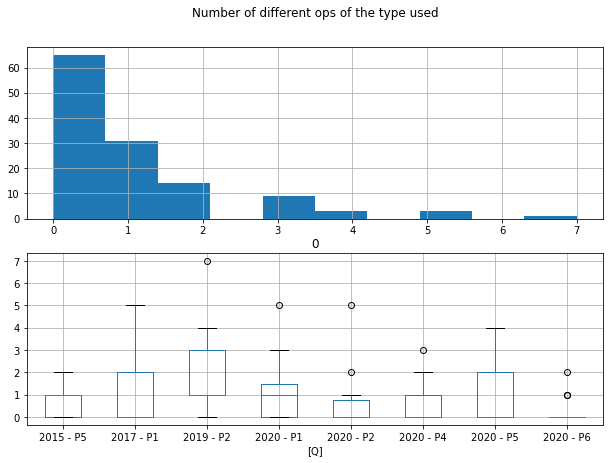

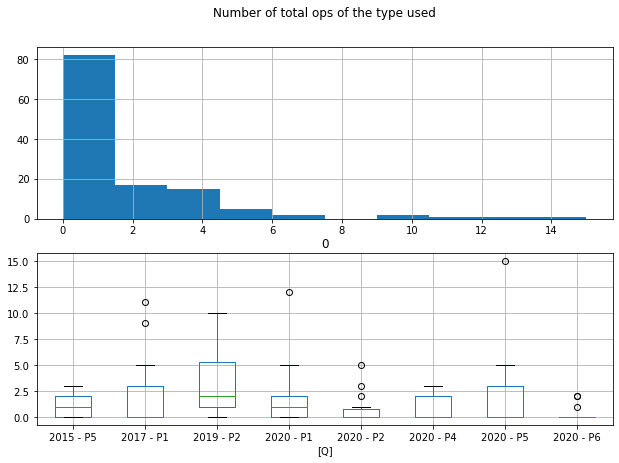

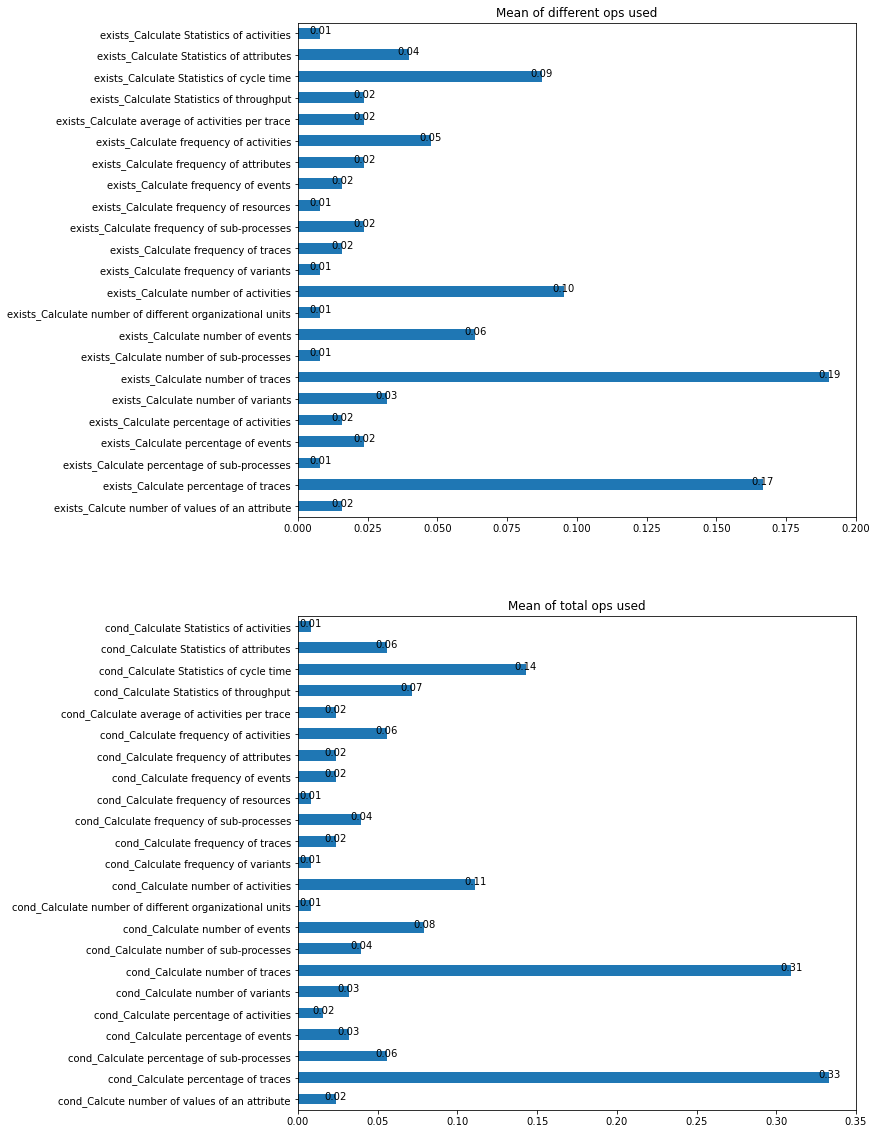

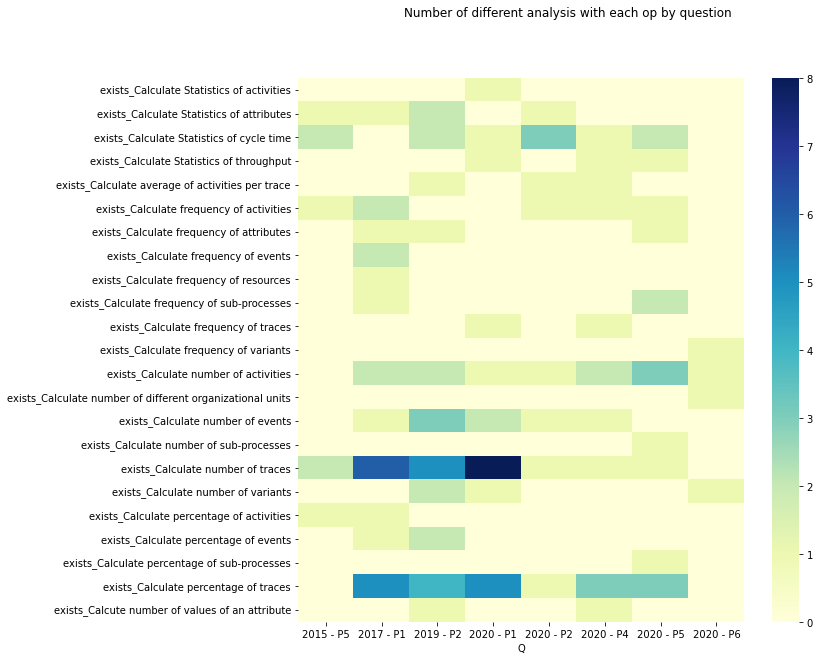

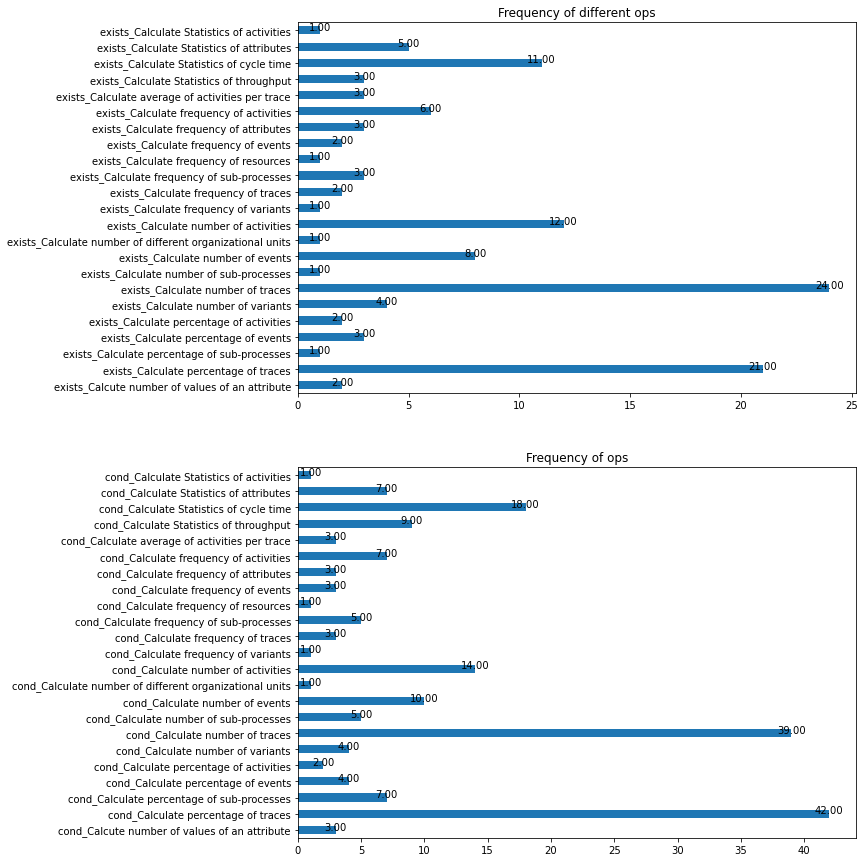

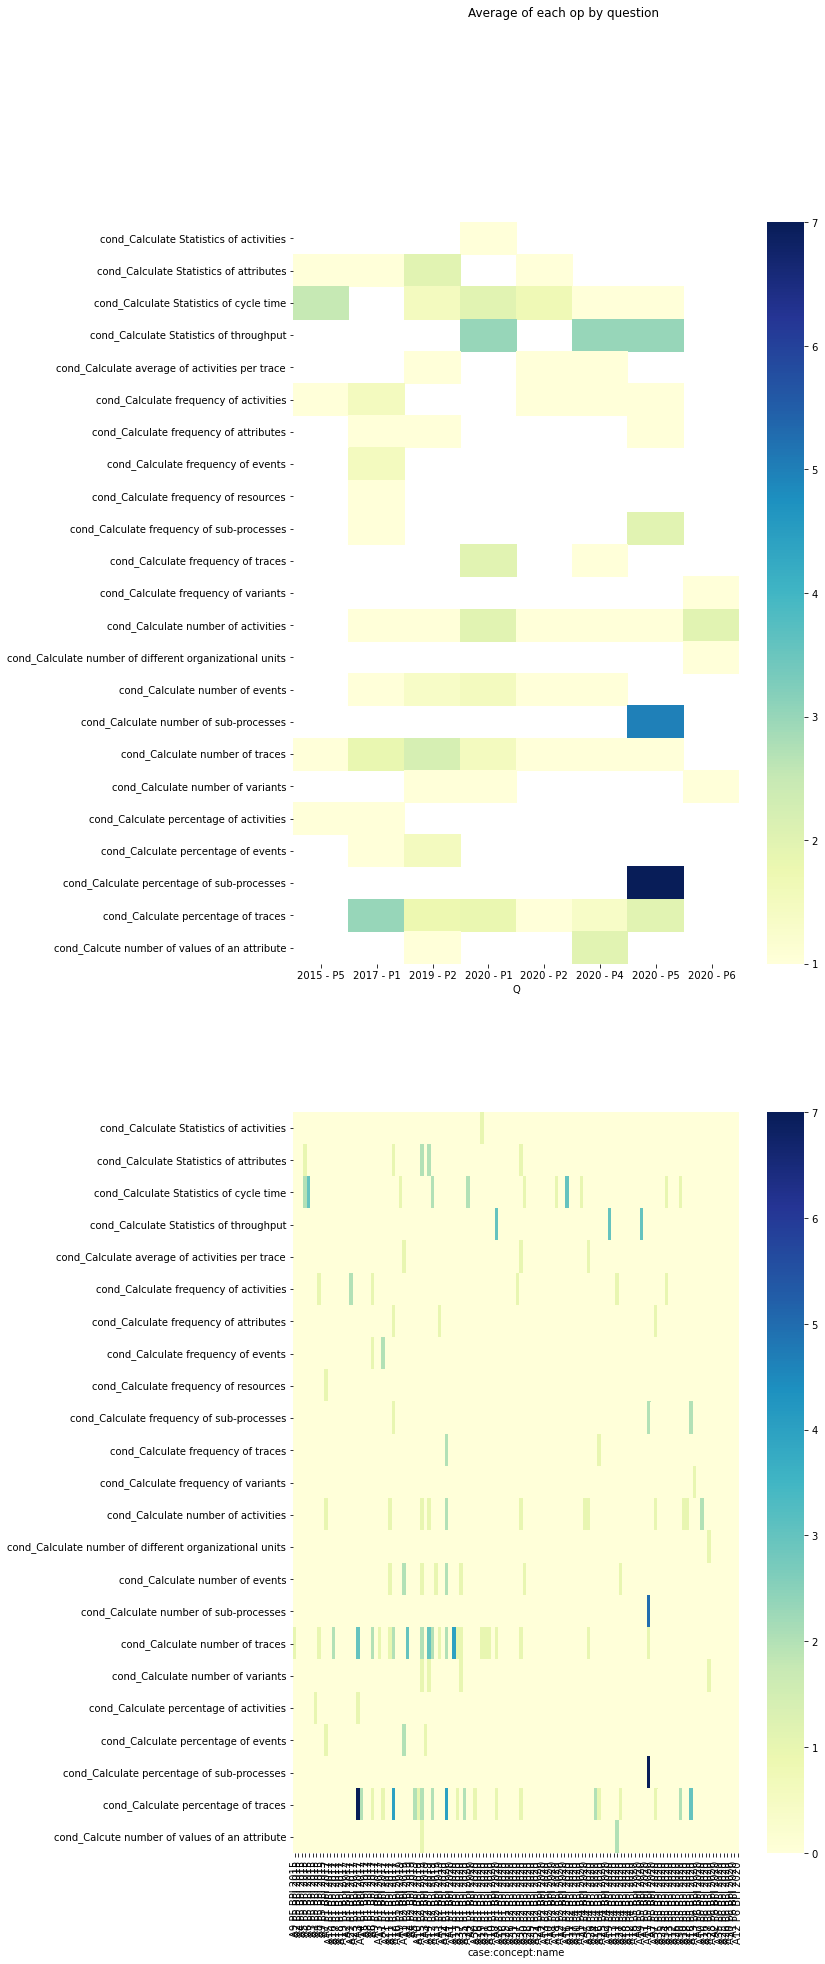

In [537]:
statistics_ops = [s for s in specific.loc[specific['Type'] == 'Calculate statistics', 'Specific operation'].drop_duplicates()]
s_statistics = analysis_ops(statistics_ops)

# Represent operations

mean of diff ops count    126.000000
mean       0.912698
std        1.065982
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        5.000000
dtype: float64
           count      mean       std  min  25%  50%   75%  max
Q                                                             
2015 - P5    9.0  1.000000  0.866025  0.0  0.0  1.0  2.00  2.0
2017 - P1   21.0  1.238095  1.091089  0.0  0.0  1.0  2.00  4.0
2019 - P2   12.0  2.083333  1.781640  0.0  1.0  1.5  3.25  5.0
2020 - P1   19.0  0.842105  0.898342  0.0  0.0  1.0  1.00  3.0
2020 - P2   18.0  0.555556  0.855585  0.0  0.0  0.0  1.00  3.0
2020 - P4   17.0  0.647059  0.492592  0.0  0.0  1.0  1.00  1.0
2020 - P5   17.0  0.764706  1.032558  0.0  0.0  1.0  1.00  4.0
2020 - P6   13.0  0.384615  0.506370  0.0  0.0  0.0  1.00  1.0
mean of total ops count    126.000000
mean       1.325397
std        2.089323
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max       14.000000


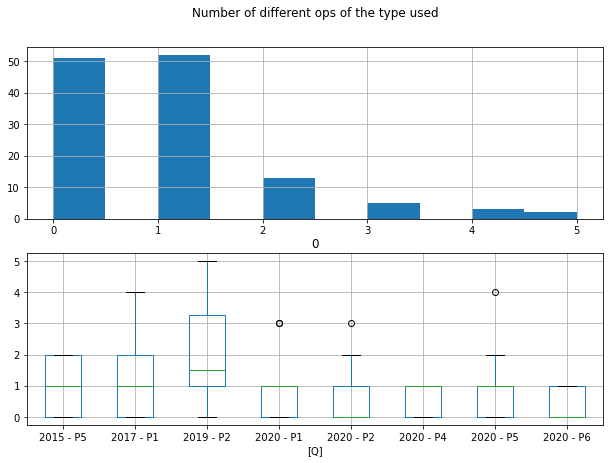

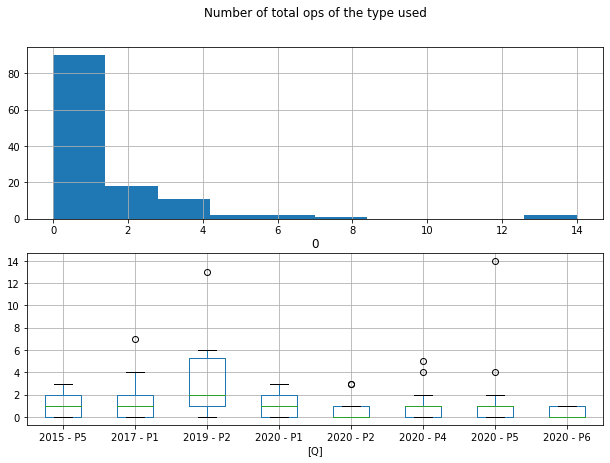

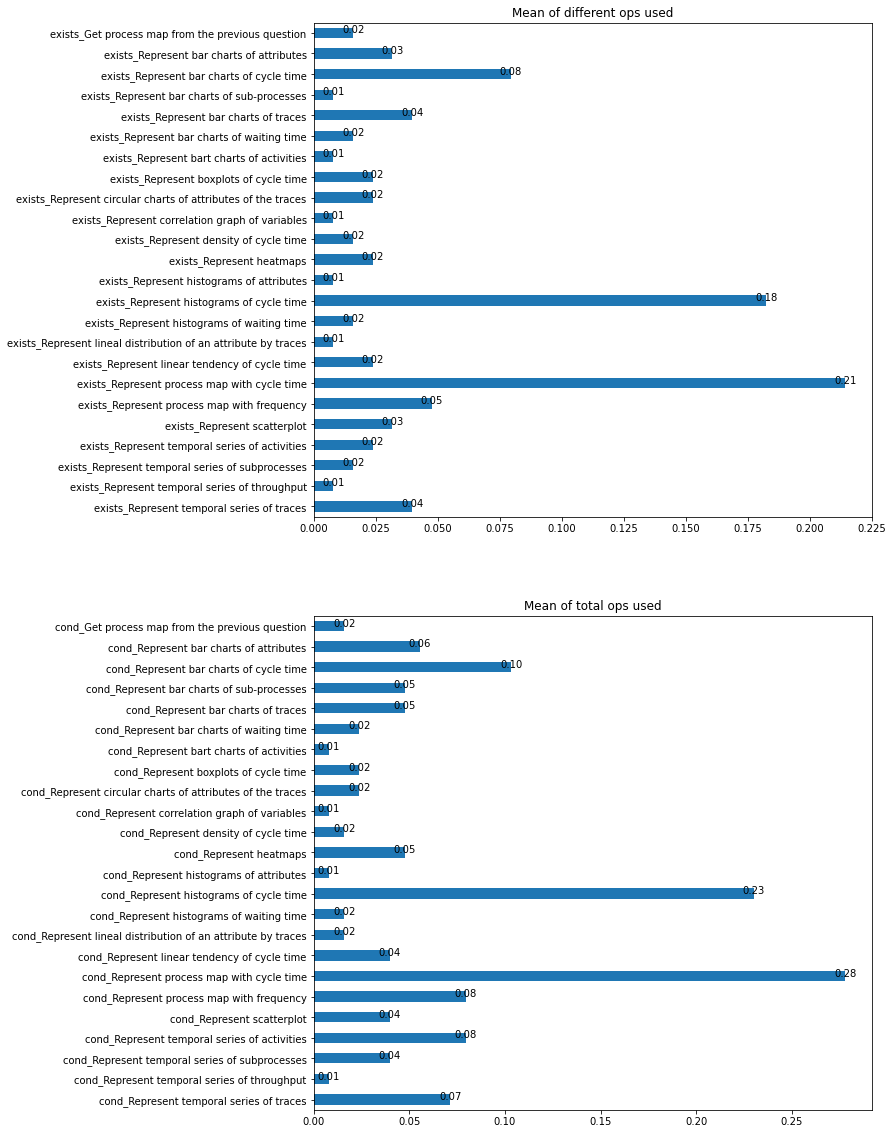

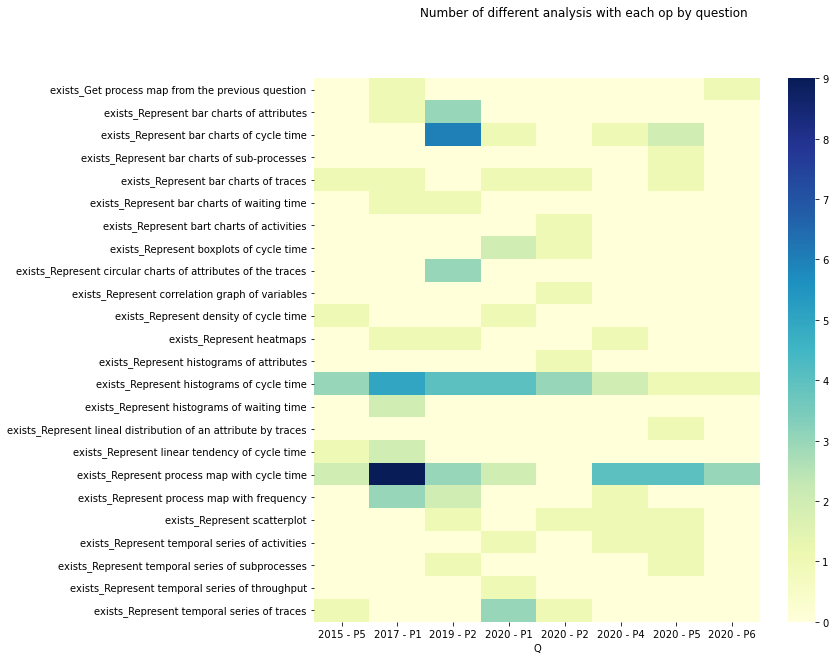

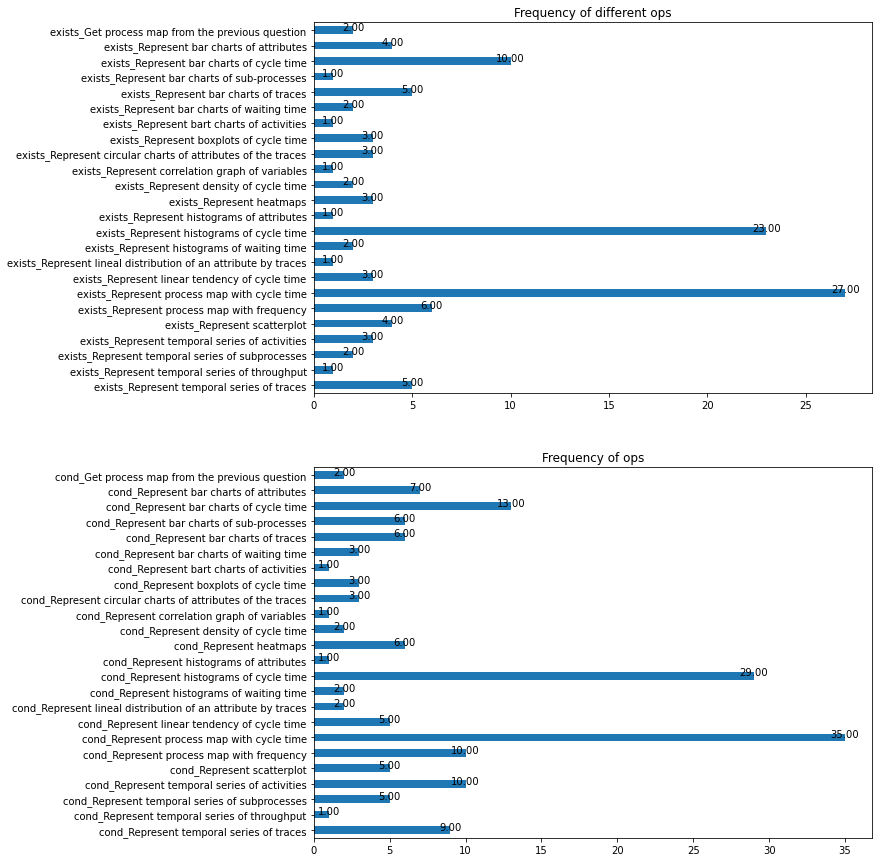

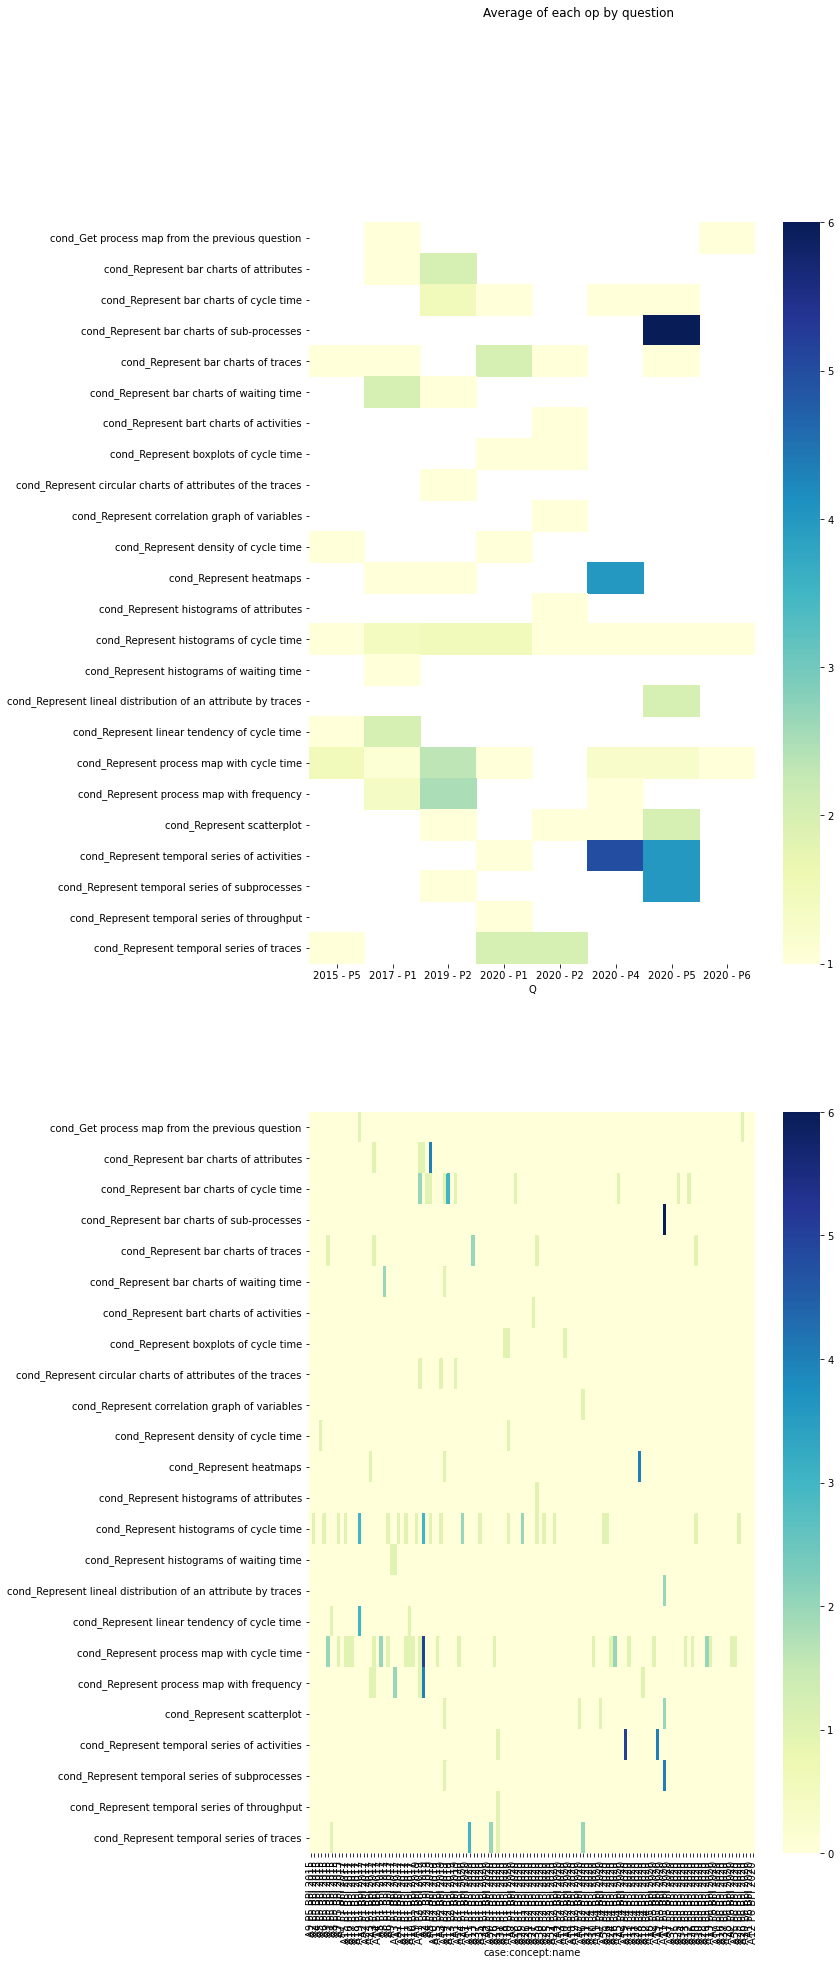

In [538]:
represent_ops = [s for s in specific.loc[specific['Type'] == 'Representation', 'Specific operation'].drop_duplicates()]
s_represent = analysis_ops(represent_ops)

In [485]:
variants(s_represent, represent_ops)

['cond_Represent scatterplot', 'cond_Represent boxplots of cycle time', 'cond_Represent histograms of cycle time', 'cond_Represent histograms of attributes', 'cond_Represent bar charts of traces', 'cond_Represent process map with cycle time', 'cond_Represent process map with frequency', 'cond_Represent bar charts of cycle time', 'cond_Represent heatmaps', 'cond_Get process map from the previous question', 'cond_Represent density of cycle time', 'cond_Represent bar charts of waiting time', 'cond_Represent histograms of waiting time', 'cond_Represent circular charts of attributes of the traces', 'cond_Represent bar charts of attributes', 'cond_Represent temporal series of subprocesses', 'cond_Represent linear tendency of cycle time', 'cond_Represent temporal series of traces', 'cond_Represent bar charts of sub-processes', 'cond_Represent lineal distribution of an attribute by traces', 'cond_Represent correlation graph of variables', 'cond_Represent bart charts of activities', 'cond_Repre

case:concept:name  \
                                                            count   
0                                                                   
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0                51   
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0                 1   
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0                 1   
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0                 1   
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1                 1   
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0                 1   
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0                 1   
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0                 1   
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0                 1   
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0                 1   
0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0                 1   
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0                 1   
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0                 1   
0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0                 1   
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0                 5   
0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0                 1   
0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0                 1   
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0                 1   
0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0                 1   
0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0                 1   
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0                15   
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0                 1   
0,0,0,0,0,1,1,2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0                 1   
0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0                 3   
0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0                 1   
0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0                 1   
0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0                 1   
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0                10   
0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0                 1   
0,0,1,0,0,0,0,1,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0                 1   
0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0                 4   
0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0                 1   
0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0                 1   
0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0                 2   
0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0                 1   
0,0,3,0,0,5,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0                 1   
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0                 2   
0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0                 1   
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0                 2   
1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0                 1   
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,6,2,0,0,0,0                 1   

                                                                                                    \
                                                                                        <lambda_0>   
0                                                                                                    
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0  {A37 P1 BPI 2020, A30 P6 BPI 2020, A1 P1 BPI 2...   
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0                                  {A19 P5 BPI 2020}   
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0                                  {A19 P4 BPI 2020}   
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0                                  {A27 P2 BPI 2020}   
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1                                  {A19 P1 BPI 2020}   
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0                                  {A30 P1 BPI 2020}   
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0                                  {A16 P2 BPI 

In [487]:
v = variants(s_represent, represent_ops, v_type='exists_')
v[v['Q']['count'] > 1]


['exists_Represent scatterplot', 'exists_Represent boxplots of cycle time', 'exists_Represent histograms of cycle time', 'exists_Represent histograms of attributes', 'exists_Represent bar charts of traces', 'exists_Represent process map with cycle time', 'exists_Represent process map with frequency', 'exists_Represent bar charts of cycle time', 'exists_Represent heatmaps', 'exists_Get process map from the previous question', 'exists_Represent density of cycle time', 'exists_Represent bar charts of waiting time', 'exists_Represent histograms of waiting time', 'exists_Represent circular charts of attributes of the traces', 'exists_Represent bar charts of attributes', 'exists_Represent temporal series of subprocesses', 'exists_Represent linear tendency of cycle time', 'exists_Represent temporal series of traces', 'exists_Represent bar charts of sub-processes', 'exists_Represent lineal distribution of an attribute by traces', 'exists_Represent correlation graph of variables', 'exists_Repre

case:concept:name  \
                                                               count   
0                                                                      
False,False,False,False,False,False,False,False...                51   
False,False,False,False,False,False,False,False...                 2   
False,False,False,False,False,False,False,False...                 2   
False,False,False,False,False,False,False,True,...                 6   
False,False,False,False,False,True,False,False,...                18   
False,False,True,False,False,False,False,False,...                12   
False,False,True,False,False,True,False,False,F...                 4   
False,True,False,False,False,False,False,False,...                 2   
True,False,False,False,False,False,False,False,...                 2   

                                                                                                       \
                                                                                           <lambda_0>   
0                                                                                                       
False,False,False,False,False,False,False,False...  {A37 P1 BPI 2020, A30 P6 BPI 2020, A1 P1 BPI 2...   
False,False,False,False,False,False,False,False...                 {A19 P5 BPI 2020, A19 P4 BPI 2020}   
False,False,False,False,False,False,False,False...                 {A30 P1 BPI 2020, A11 P1 BPI 2020}   
False,False,False,False,False,False,False,True,...  {A4 P2 BPI 2019, A25 P5 BPI 2020, A12 P5 BPI 2...   
False,False,False,False,False,True,False,False,...  {A16 P4 BPI 2020, A24 P4 BPI 2020, A2 P6 BPI 2...   
False,False,True,False,False,False,False,False,...  {A26 P4 BPI 2020, A28 P2 BPI 2020, A1 P1 BPI 2...   
False,False,True,False,False,True,False,False,F...  {A6 P1 BPI 2017, A7 P5 BPI 2015, A15 P1 BPI 20...   
False,True,False,False,False,False,False,False,...                 {A18 P1 BPI 2020, A10 P2 BPI 2020}   
True,False,False,False,False,False,False,False,...                   {A7 P4 BPI 2020, A7 P2 BPI 2020}   

                                                       Q  \
                                                   count   
0                                                          
False,False,False,False,False,False,False,False...    51   
False,False,False,False,False,False,False,False...     2   
False,False,False,False,False,False,False,False...     2   
False,False,False,False,False,False,False,True,...     6   
False,False,False,False,False,True,False,False,...    18   
False,False,True,False,False,False,False,False,...    12   
False,False,True,False,False,True,False,False,F...     4   
False,True,False,False,False,False,False,False,...     2   
True,False,False,False,False,False,False,False,...     2   

                                                                                                       
                                                                                           <lambda_0>  
0                                                                                                      
False,False,False,False,False,False,False,False...  {2020 - P6, 2020 - P5, 2019 - P2, 2020 - P1, 2...  
False,False,False,False,False,False,False,False...                             {2020 - P4, 2020 - P5}  
False,False,False,False,False,False,False,False...                                        {2020 - P1}  
False,False,False,False,False,False,False,True,...       {2020 - P1, 2020 - P4, 2020 - P5, 2019 - P2}  
False,False,False,False,False,True,False,False,...  {2020 - P6, 2020 - P5, 2019 - P2, 2020 - P1, 2...  
False,False,True,False,False,False,False,False,...  {2020 - P6, 2019 - P2, 2020 - P1, 2020 - P4, 2...  
False,False,True,False,False,True,False,False,F...                             {2015 - P5, 2017 - P1}  
False,True,False,False,False,False,False,False,...                             {2020 - P1, 2020 - P2}  
True,False,False,False,False,False,False,False,...          

# Identify bottlenecks operations

mean of diff ops count    126.000000
mean       0.452381
std        0.545632
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
dtype: float64
           count      mean       std  min  25%  50%   75%  max
Q                                                             
2015 - P5    9.0  0.888889  0.600925  0.0  1.0  1.0  1.00  2.0
2017 - P1   21.0  0.904762  0.436436  0.0  1.0  1.0  1.00  2.0
2019 - P2   12.0  0.250000  0.452267  0.0  0.0  0.0  0.25  1.0
2020 - P1   19.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
2020 - P2   18.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
2020 - P4   17.0  0.117647  0.332106  0.0  0.0  0.0  0.00  1.0
2020 - P5   17.0  0.941176  0.428746  0.0  1.0  1.0  1.00  2.0
2020 - P6   13.0  0.692308  0.480384  0.0  0.0  1.0  1.00  1.0
mean of total ops count    126.000000
mean       0.484127
std        0.616235
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000


case:concept:name  \
                      count   
0                             
0,0,0,0,0                72   
0,0,0,0,1                 1   
0,0,0,1,0                 2   
0,0,1,0,0                 4   
0,1,0,0,0                 9   
0,2,0,1,0                 1   
1,0,0,0,0                32   
1,0,0,1,0                 2   
2,0,0,0,0                 3   

                                                                 Q  \
                                                  <lambda_0> count   
0                                                                    
0,0,0,0,0  {A37 P1 BPI 2020, A28 P2 BPI 2020, A1 P1 BPI 2...    72   
0,0,0,0,1                                  {A34 P5 BPI 2020}     1   
0,0,0,1,0                   {A4 P5 BPI 2015, A9 P5 BPI 2015}     2   
0,0,1,0,0  {A37 P5 BPI 2020, A28 P5 BPI 2020, A28 P6 BPI ...     4   
0,1,0,0,0  {A14 P1 BPI 2017, A1 P1 BPI 2017, A18 P5 BPI 2...     9   
0,2,0,1,0                                  {A11 P5 BPI 2020}     1   
1,0,0,0,0  {A30 P6 BPI 2020, A21 P1 BPI 2017, A6 P1 BPI 2...    32   
1,0,0,1,0                  {A8 P5 BPI 2015, A12 P1 BPI 2017}     2   
2,0,0,0,0  {A2 P2 BPI 2019, A18 P1 BPI 2017, A30 P5 BPI 2...     3   

                                                              
                                                  <lambda_0>  
0                                                             
0,0,0,0,0  {2020 - P6, 2020 - P5, 2019 - P2, 2020 - P1, 2...  
0,0,0,0,1                                        {2020 - P5}  
0,0,0,1,0                                        {2015 - P5}  
0,0,1,0,0                             {2020 - P6, 2020 - P5}  
0,1,0,0,0       {2015 - P5, 2020 - P5, 2017 - P1, 2019 - P2}  
0,2,0,1,0                                        {2020 - P5}  
1,0,0,0,0  {2020 - P6, 2020 - P5, 2020 - P4, 2015 - P5, 2...  
1,0,0,1,0                             {2015 - P5, 2017 - P1}  
2,0,0,0,0                  {2020 - P5, 2017 - P1, 2019 - P2}

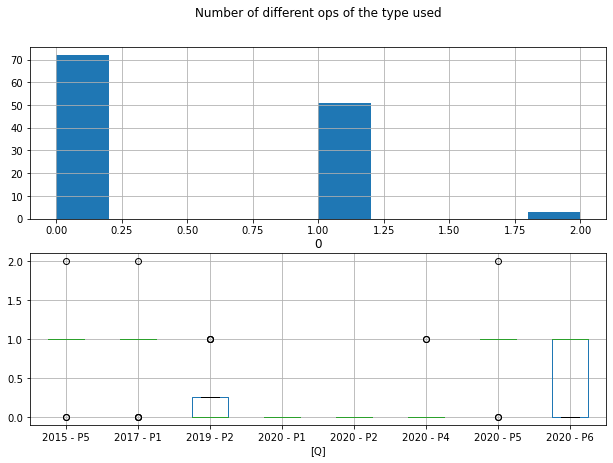

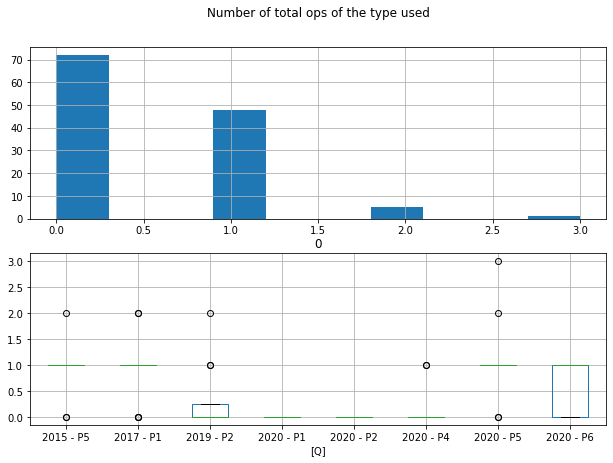

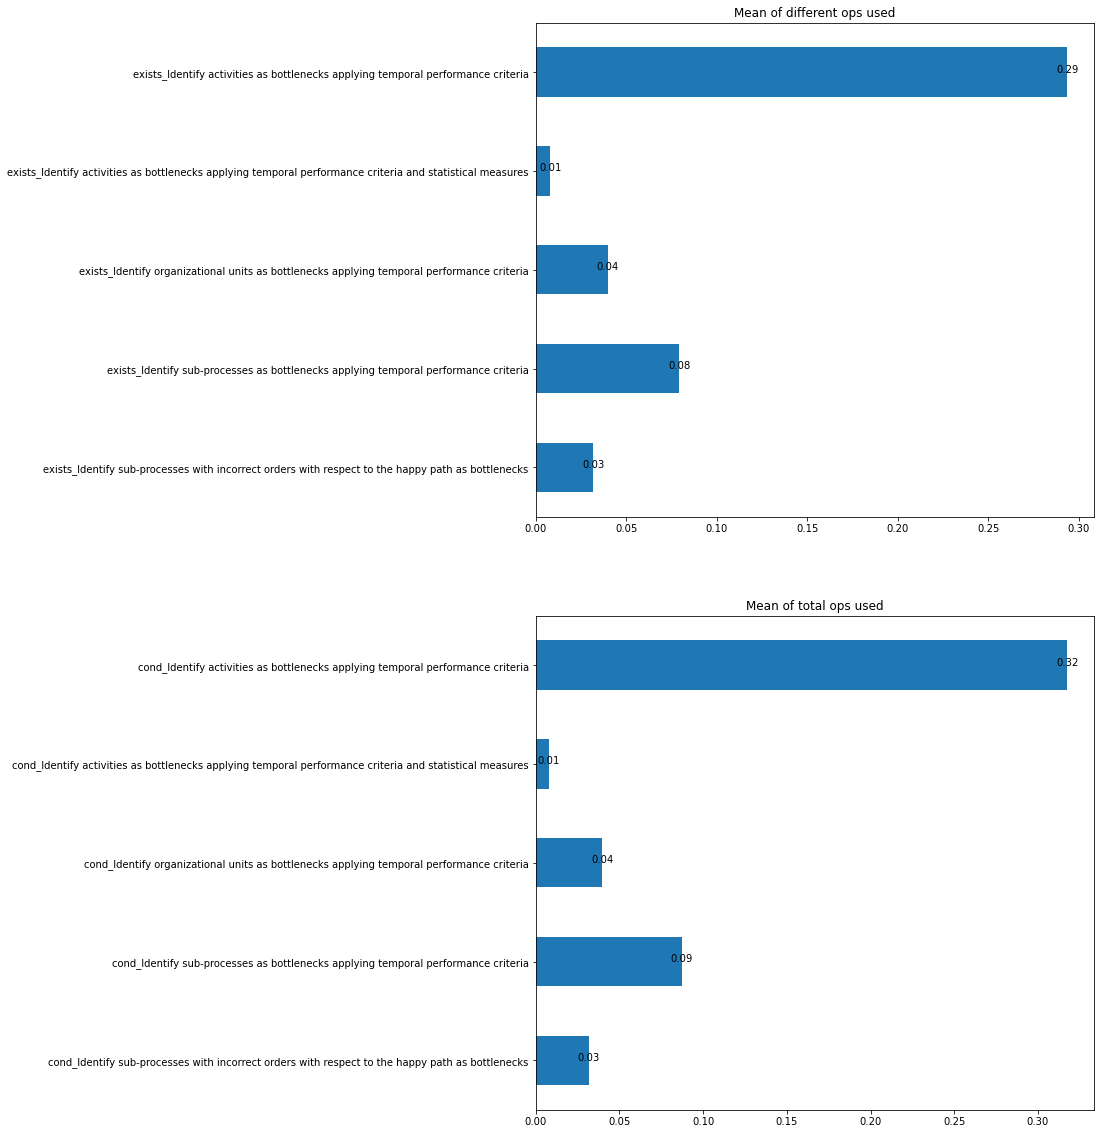

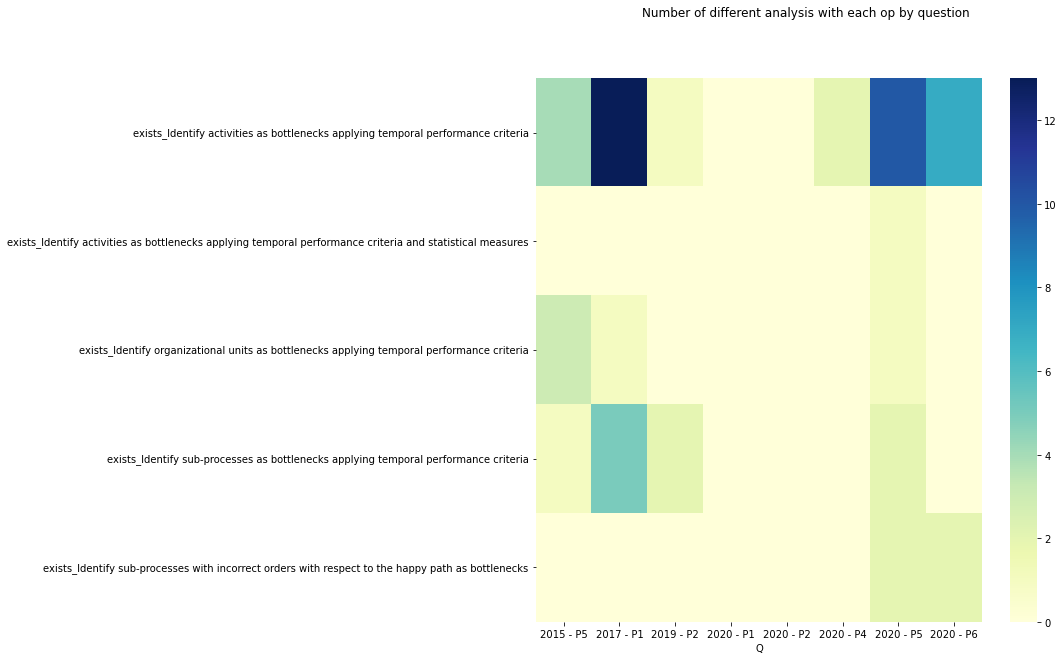

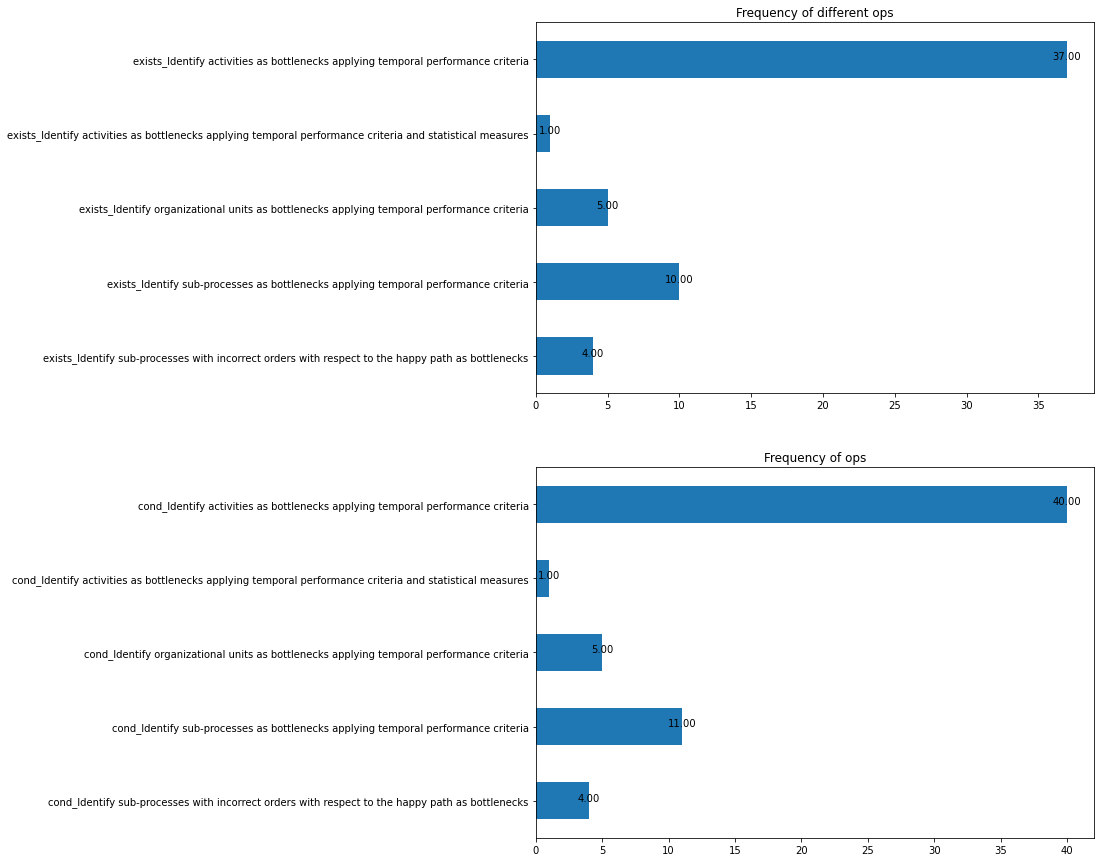

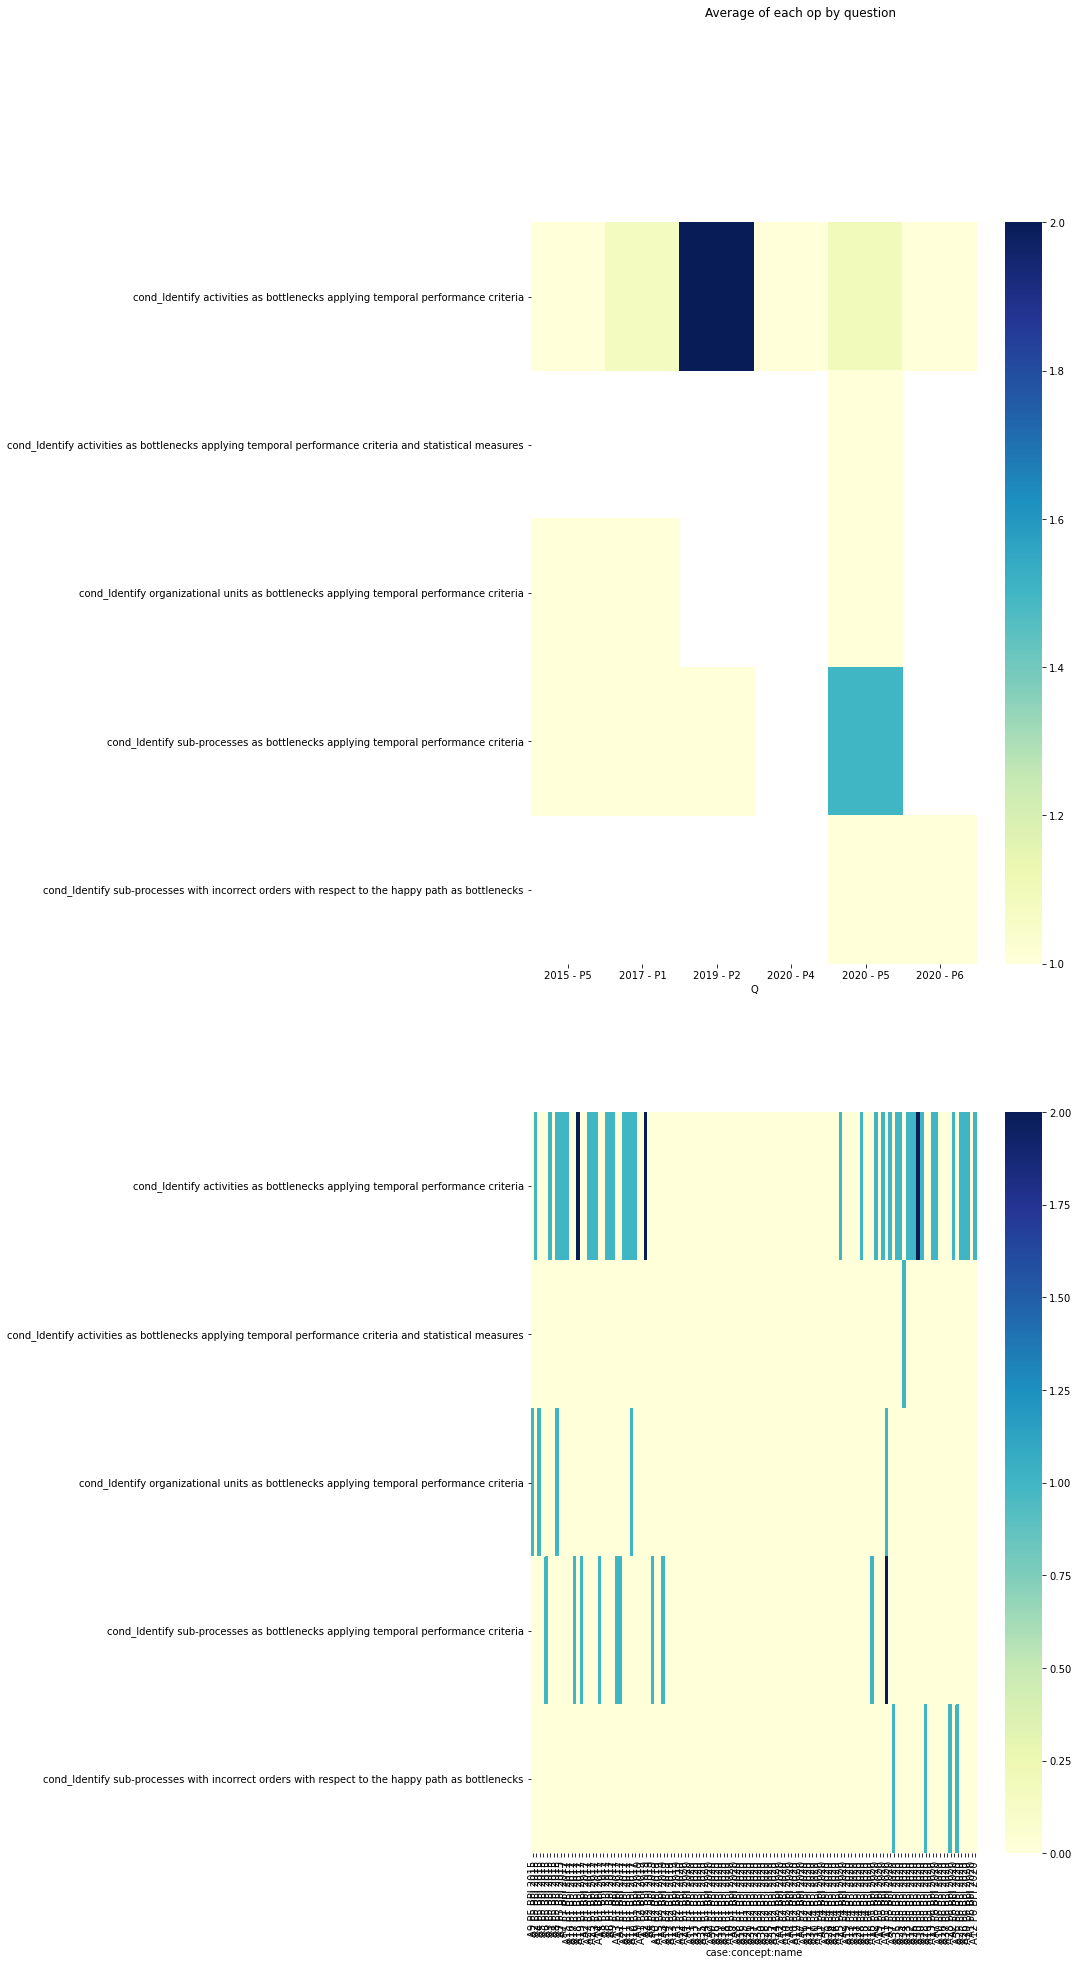

In [536]:
bottleneck_ops = specific[specific['concept:name']=='Identify bottlenecks']['Specific operation'].unique()
s_bottlenecks = analysis_ops(bottleneck_ops)

# Variants with multiset for cycle time
variants(s_bottlenecks, bottleneck_ops)

# Analyze time

mean of diff ops count    126.000000
mean       2.047619
std        1.264007
min        0.000000
25%        1.000000
50%        2.000000
75%        2.750000
max        7.000000
dtype: float64
           count      mean       std  min  25%  50%   75%  max
Q                                                             
2015 - P5    9.0  3.000000  1.322876  2.0  2.0  3.0  3.00  6.0
2017 - P1   21.0  3.238095  1.445848  1.0  2.0  3.0  4.00  7.0
2019 - P2   12.0  2.583333  1.240112  1.0  2.0  2.0  3.25  5.0
2020 - P1   19.0  1.631579  1.011628  0.0  1.0  2.0  2.00  4.0
2020 - P2   18.0  1.444444  0.855585  0.0  1.0  2.0  2.00  3.0
2020 - P4   17.0  1.235294  0.970143  0.0  1.0  1.0  2.00  3.0
2020 - P5   17.0  1.882353  0.857493  0.0  2.0  2.0  2.00  4.0
2020 - P6   13.0  1.692308  0.630425  1.0  1.0  2.0  2.00  3.0
mean of total ops count    126.000000
mean       2.452381
std        1.755481
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000


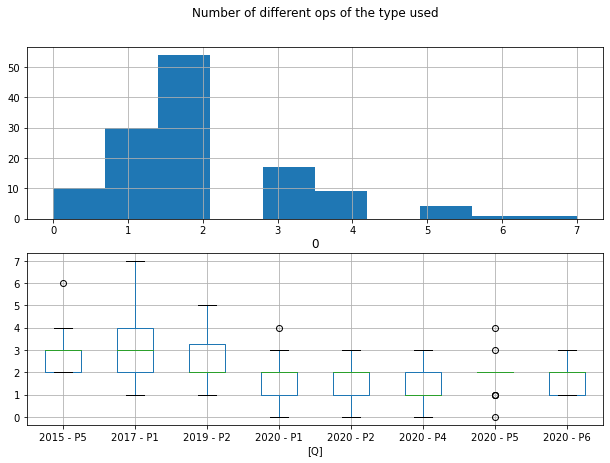

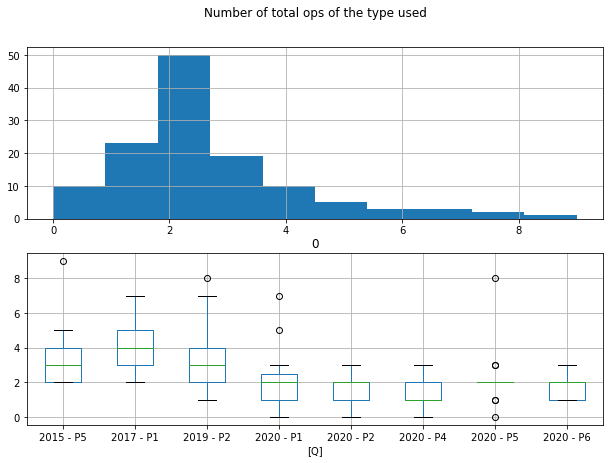

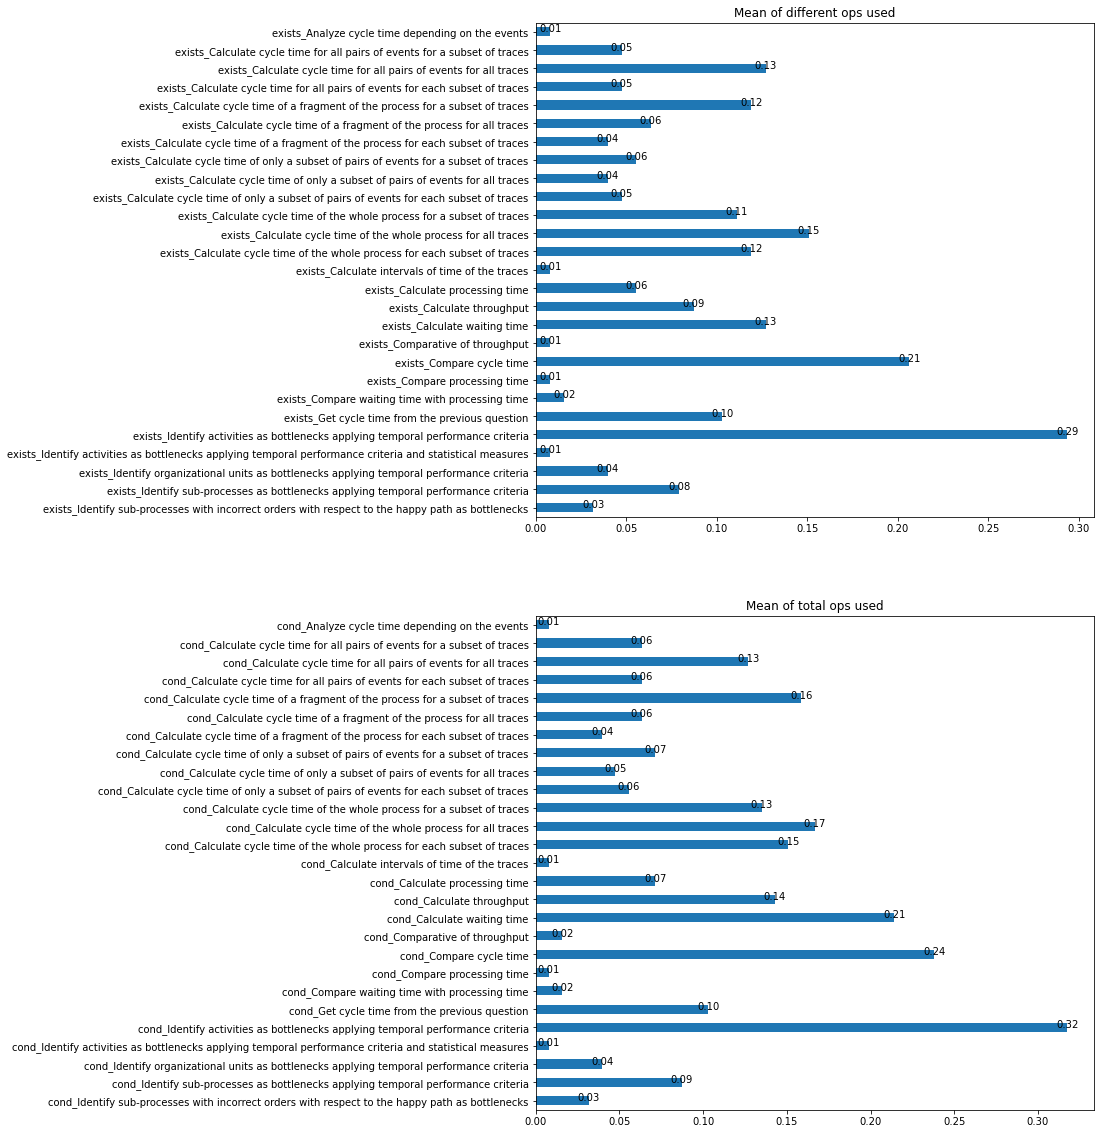

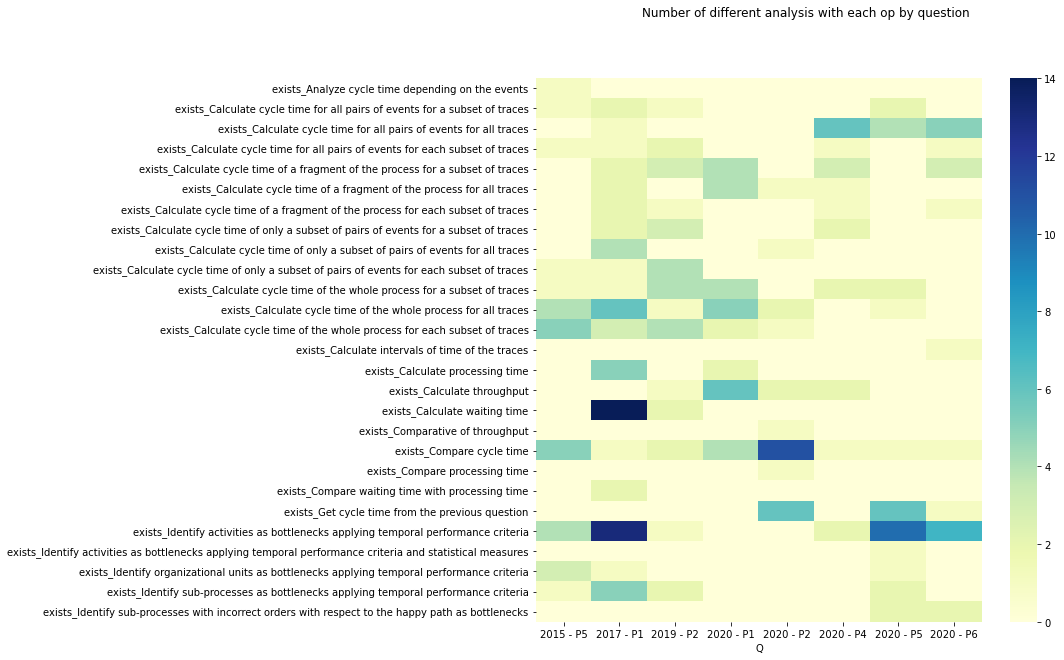

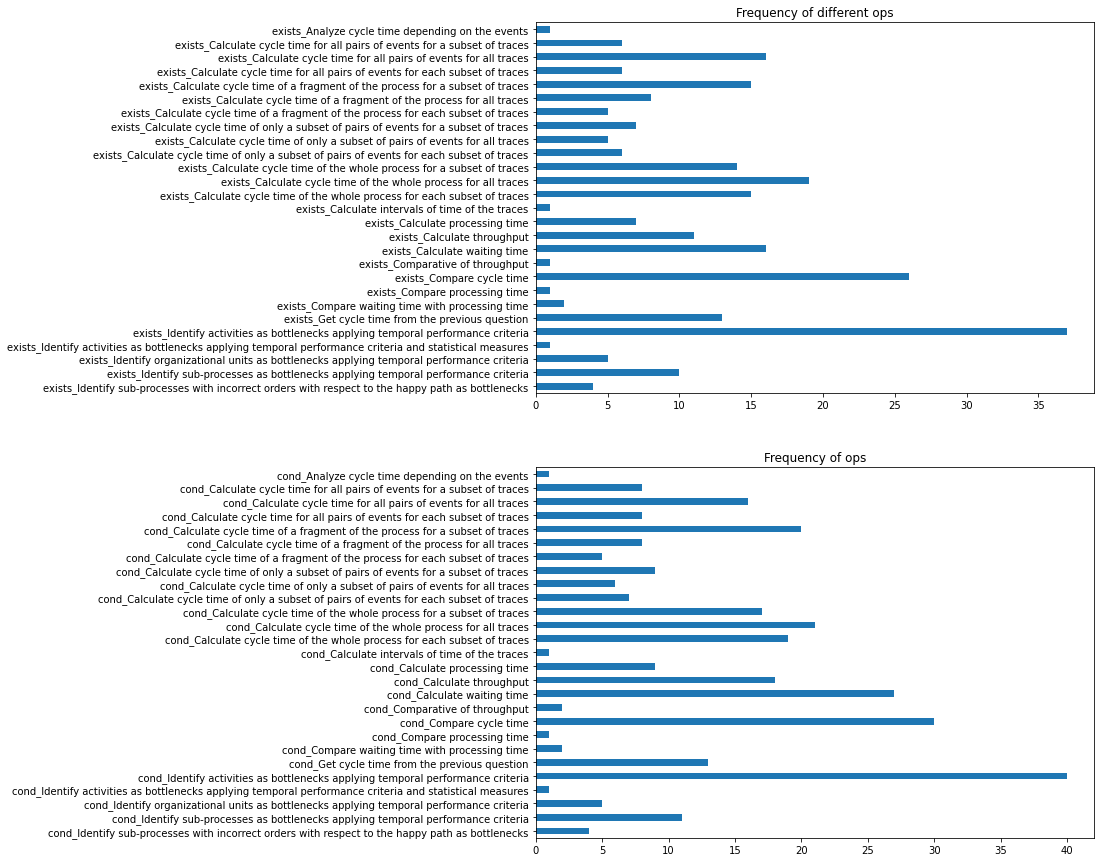

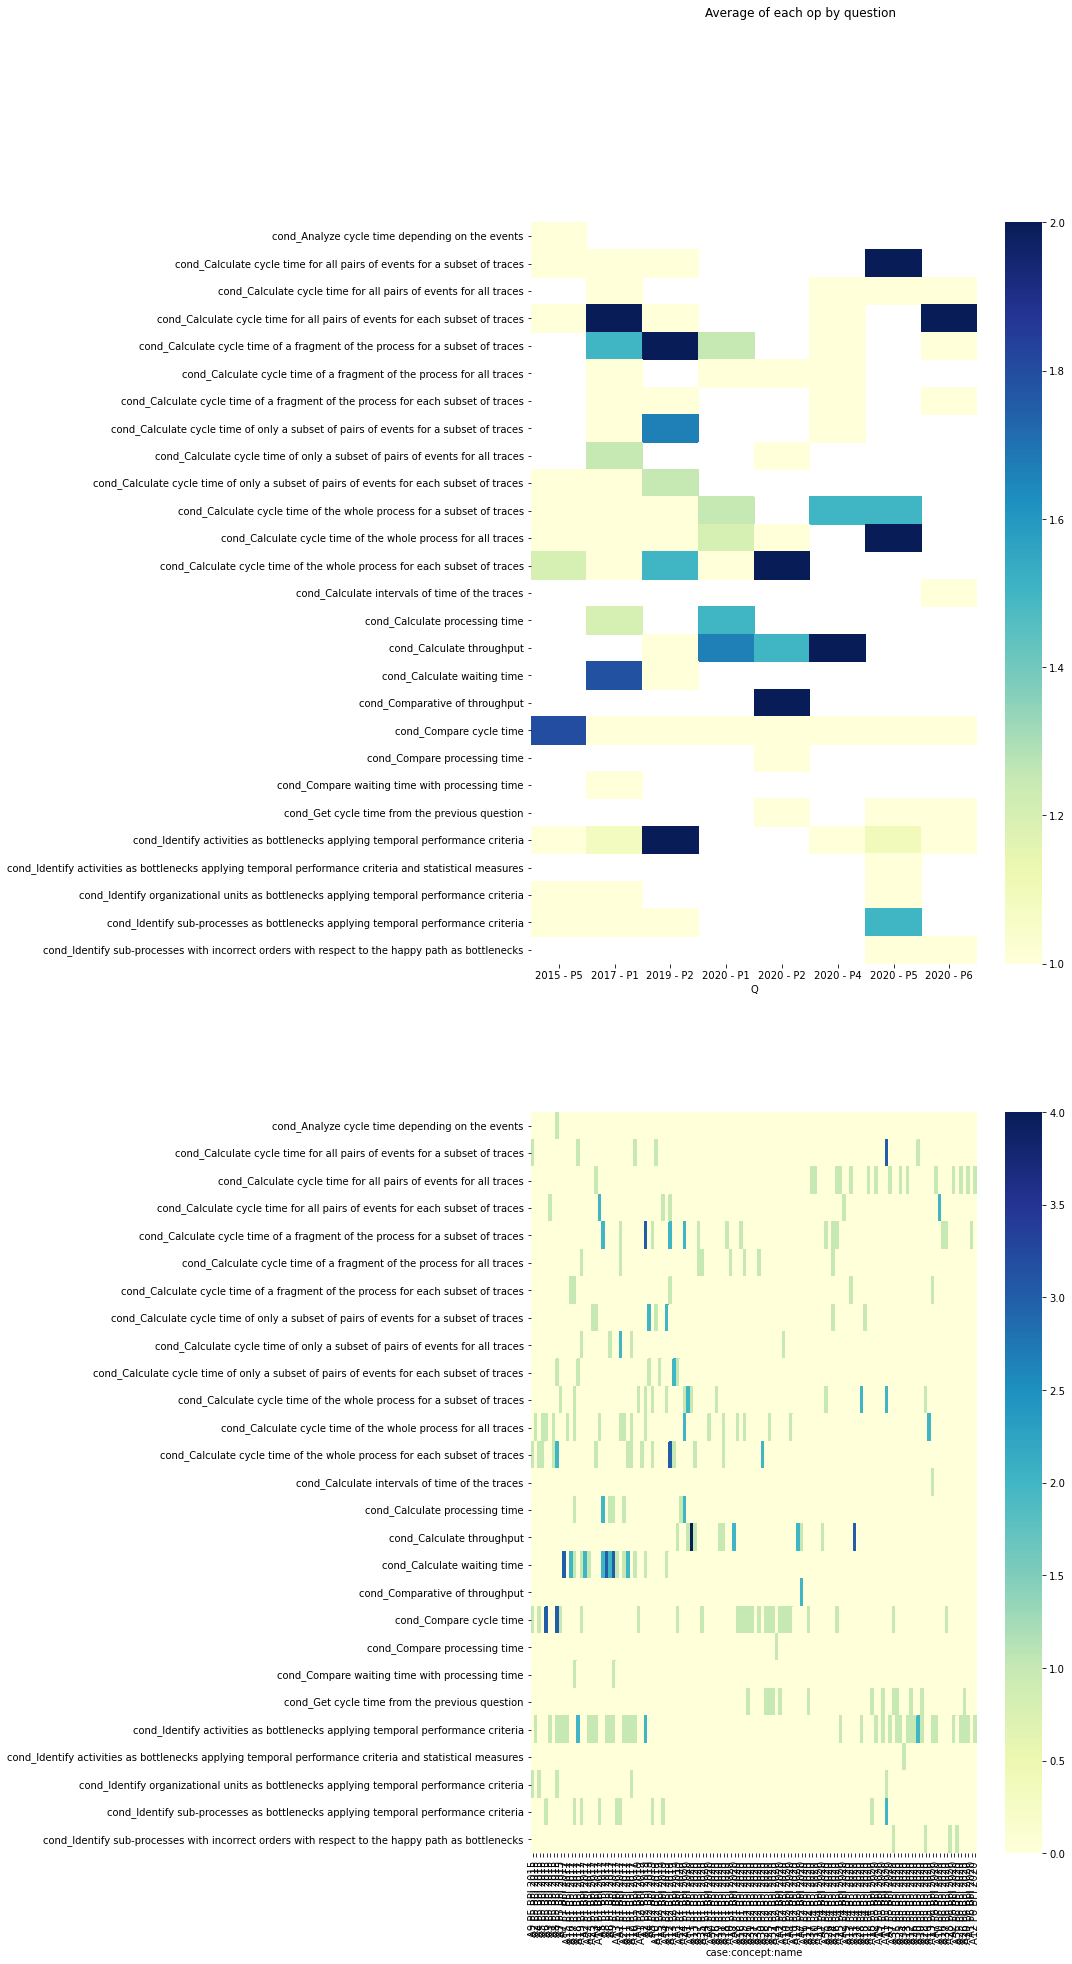

In [530]:
analyze_ops = specific[specific['Type']=='Analyze Cycle Time']['Specific operation'].unique()
analyze_s = analysis_ops(analyze_ops)

In [476]:
# Variants with multiset for cycle time
analyze_variants = variants(analyze_s, analyze_ops)
analyze_variants[analyze_variants["Q"]["count"] > 1]

['cond_Calculate cycle time of the whole process for all traces', 'cond_Compare cycle time', 'cond_Get cycle time from the previous question', 'cond_Calculate throughput', 'cond_Comparative of throughput', 'cond_Calculate cycle time of only a subset of pairs of events for all traces', 'cond_Calculate cycle time of a fragment of the process for all traces', 'cond_Calculate cycle time for all pairs of events for each subset of traces', 'cond_Calculate cycle time for all pairs of events for all traces', 'cond_Calculate cycle time of a fragment of the process for each subset of traces', 'cond_Calculate cycle time of only a subset of pairs of events for a subset of traces', 'cond_Identify activities as bottlenecks applying temporal performance criteria', 'cond_Calculate cycle time of the whole process for a subset of traces', 'cond_Calculate cycle time of a fragment of the process for a subset of traces', 'cond_Identify sub-processes as bottlenecks applying temporal performance criteria', '

case:concept:name  \
                                                               count   
0                                                                      
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...                10   
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0...                 2   
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0...                 3   
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3...                 2   
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...                 3   
0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0...                10   
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...                 2   
0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...                 2   
0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0...                 5   
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...                 2   
0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0...                 2   
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...                 2   
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...                 5   
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0...                 2   
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0...                 2   
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...                 2   

                                                                                                       \
                                                                                           <lambda_0>   
0                                                                                                       
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...  {A26 P4 BPI 2020, A18 P2 BPI 2020, A34 P1 BPI ...   
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0...                 {A28 P6 BPI 2020, A35 P6 BPI 2020}   
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0...  {A16 P6 BPI 2020, A1 P6 BPI 2020, A18 P1 BPI 2...   
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3...                   {A8 P1 BPI 2017, A7 P1 BPI 2017}   
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...  {A37 P4 BPI 2020, A10 P4 BPI 2020, A12 P4 BPI ...   
0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0...  {A30 P6 BPI 2020, A2 P6 BPI 2020, A25 P5 BPI 2...   
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...                  {A7 P4 BPI 2020, A19 P1 BPI 2020}   
0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...                  {A7 P1 BPI 2020, A12 P2 BPI 2020}   
0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0...  {A10 P5 BPI 2020, A26 P6 BPI 2020, A12 P5 BPI ...   
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...                 {A31 P2 BPI 2020, A10 P2 BPI 2020}   
0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0...                 {A16 P1 BPI 2020, A37 P6 BPI 2020}   
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...                 {A35 P1 BPI 2020, A35 P2 BPI 2020}   
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...  {A26 P2 BPI 2020, A28 P2 BPI 2020, A11 P2 BPI ...   
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0...                   {A5 P5 BPI 2015, A1 P5 BPI 2015}   
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0...                  {A15 P1 BPI 2017, A2 P5 BPI 2015}   
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...                  {A28 P1 BPI 2020, A1 P2 BPI 2020}   

                                                       Q  \
                                                   count   
0                                                          
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...    10   
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0...     2   
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0...     3   
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3...     2   
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...     3   
0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0...    10   
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...     2   
0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...     2   
0,0,1,0,0,0,0,0,0,0,0,1,0,

# Everything

Q            
2015 - P5  4     2
           6     2
           8     1
           9     1
           11    1
           12    1
           13    1
2017 - P1  2     1
           4     3
           5     5
           6     2
           7     2
           8     1
           9     1
           10    3
           13    1
           15    1
           21    1
2019 - P2  5     2
           7     1
           8     2
           9     1
           13    1
           14    3
           16    1
           17    1
2020 - P1  1     1
           3     5
           4     5
           5     3
           6     2
           7     1
           10    1
           12    1
2020 - P2  1     2
           2     8
           3     5
           4     1
           5     1
           12    1
2020 - P4  1     2
           2     4
           3     3
           4     2
           5     2
           8     3
           9     1
2020 - P5  2     4
           3     8
           6     2
           8     2
           20    

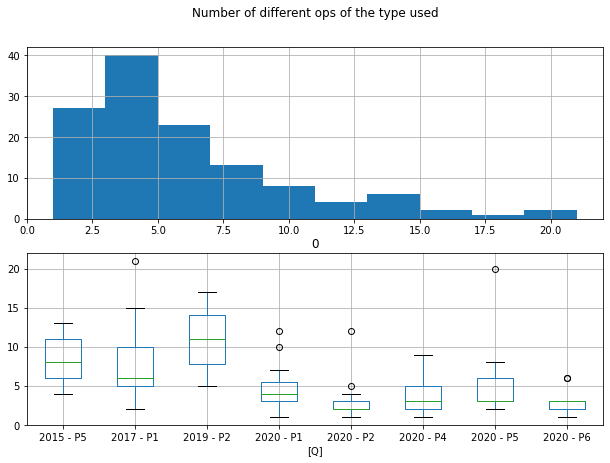

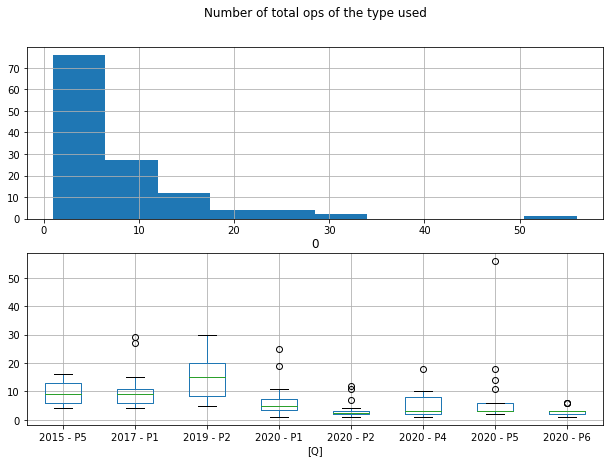

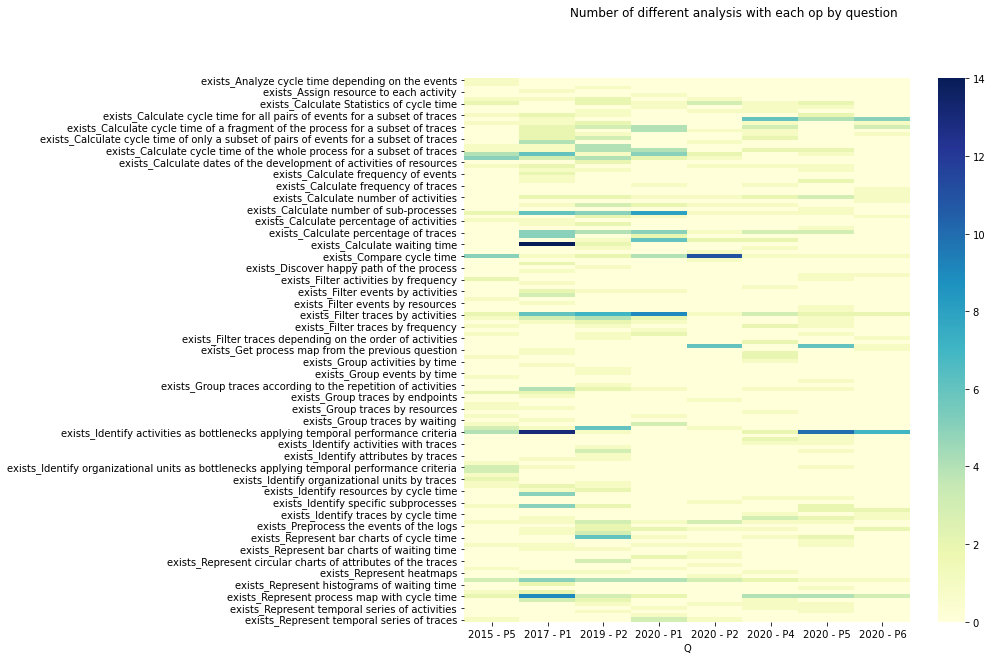

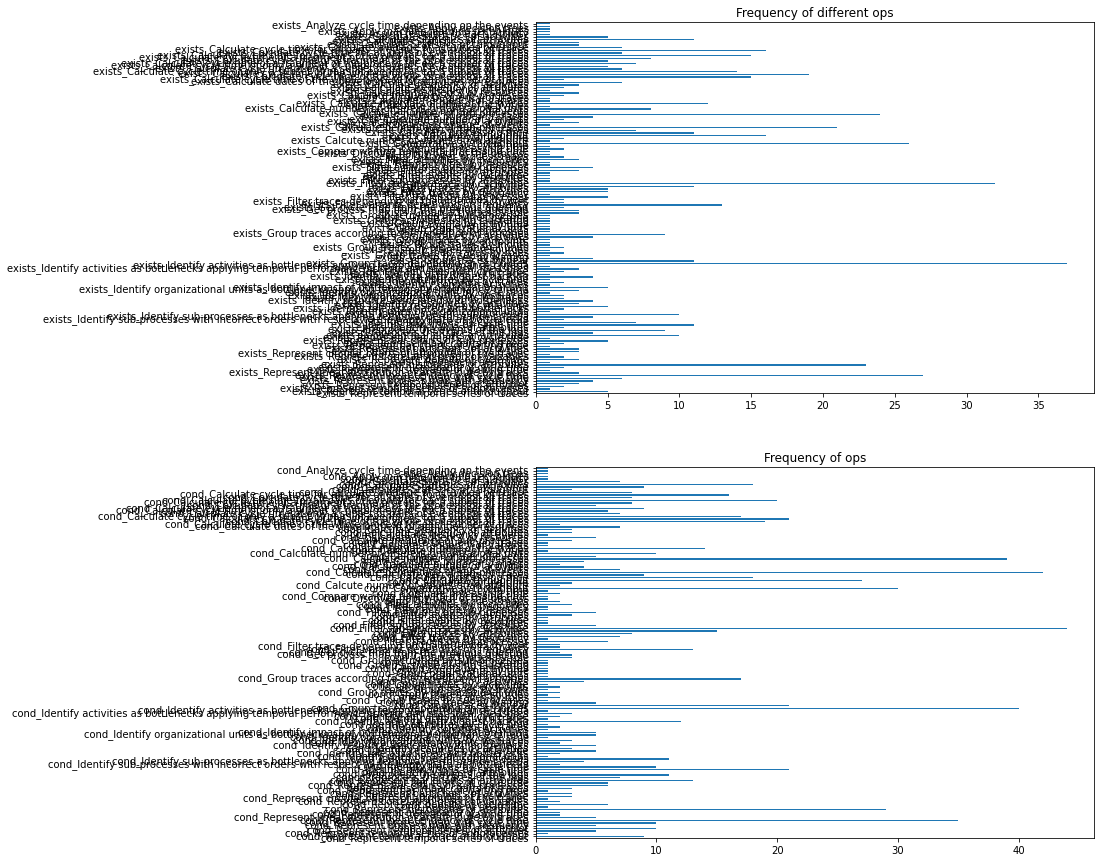

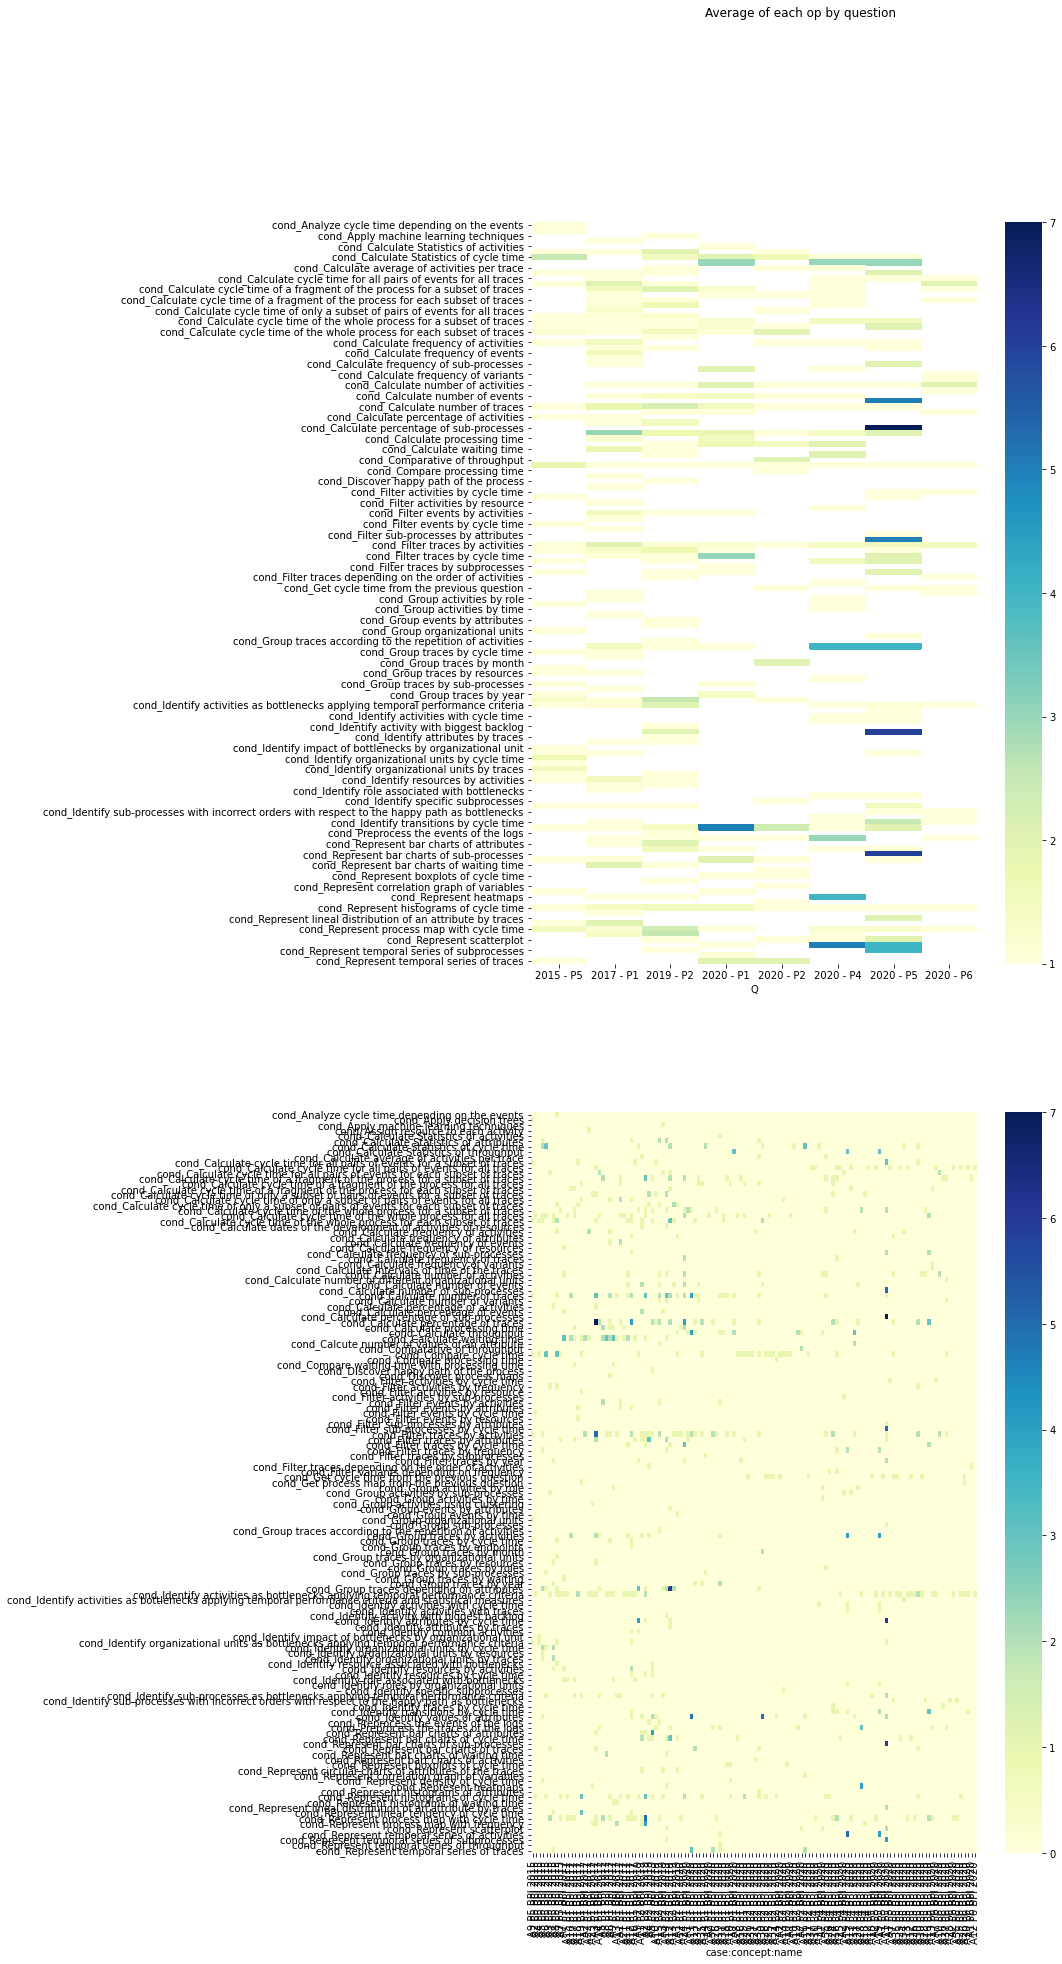

In [506]:
all_ops = specific['Specific operation'].unique()
all_s = analysis_ops(all_ops)

In [551]:
v = all_s[all_s['Q']=="2020 - P5"][["exists_"+s for s in all_ops]].sum() * all_s[all_s['Q']=="2020 - P6"][["exists_"+s for s in all_ops]].sum()
v[v>0]

exists_Compare cycle time                                                                             1
exists_Get cycle time from the previous question                                                      6
exists_Represent histograms of cycle time                                                             1
exists_Calculate number of activities                                                                 3
exists_Filter traces by activities                                                                    4
exists_Represent process map with cycle time                                                         12
exists_Calculate cycle time for all pairs of events for all traces                                   20
exists_Identify activities as bottlenecks applying temporal performance criteria                     70
exists_Filter activities by cycle time                                                                1
exists_Identify sub-processes with incorrect orders with respect

In [478]:
# Variants with multiset for cycle time
all_variants = variants(all_s, all_ops)
all_variants[all_variants["Q"]["count"] > 1]

['cond_Calculate cycle time of the whole process for all traces', 'cond_Compare cycle time', 'cond_Get cycle time from the previous question', 'cond_Calculate throughput', 'cond_Comparative of throughput', 'cond_Represent scatterplot', 'cond_Represent boxplots of cycle time', 'cond_Preprocess the traces of the logs', 'cond_Calculate cycle time of only a subset of pairs of events for all traces', 'cond_Identify specific subprocesses', 'cond_Calculate Statistics of cycle time', 'cond_Represent histograms of cycle time', 'cond_Calculate cycle time of a fragment of the process for all traces', 'cond_Calculate number of traces', 'cond_Calculate number of activities', 'cond_Calculate average of activities per trace', 'cond_Calculate percentage of traces', 'cond_Calculate Statistics of attributes', 'cond_Group traces depending on attributes', 'cond_Represent histograms of attributes', 'cond_Represent bar charts of traces', 'cond_Filter traces by activities', 'cond_Filter activities by sub-pro

case:concept:name  \
                                                               count   
0                                                                      
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...                 2   
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...                 2   
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...                 2   
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...                 3   
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...                 2   
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...                 4   

                                                                                                       \
                                                                                           <lambda_0>   
0                                                                                                       
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...                 {A37 P4 BPI 2020, A12 P4 BPI 2020}   
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...                   {A7 P6 BPI 2020, A7 P5 BPI 2020}   
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...                 {A25 P4 BPI 2020, A25 P5 BPI 2020}   
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...  {A13 P5 BPI 2020, A2 P5 BPI 2020, A2 P6 BPI 2020}   
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...                  {A1 P5 BPI 2020, A35 P5 BPI 2020}   
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...  {A37 P2 BPI 2020, A26 P2 BPI 2020, A11 P2 BPI ...   

                                                       Q  \
                                                   count   
0                                                          
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...     2   
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...     2   
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...     2   
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...     3   
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...     2   
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...     4   

                                                                            
                                                                <lambda_0>  
0                                                                           
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...             {2020 - P4}  
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...  {2020 - P6, 2020 - P5}  
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...  {2020 - P4, 2020 - P5}  
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...  {2020 - P6, 2020 - P5}  
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...             {2020 - P5}  
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...             {2020 - P2}

In [182]:
# Number of duplicates with length
s_full[s_full.loc[:,['cond_'+s for s in subset]].duplicated(keep=False)][['cond_'+s for s in subset]].sum(axis=1)

case:concept:name
A1 P5 BPI 2020     2
A11 P2 BPI 2020    2
A12 P4 BPI 2020    1
A13 P5 BPI 2020    3
A2 P2 BPI 2020     2
A2 P5 BPI 2020     3
A2 P6 BPI 2020     3
A25 P4 BPI 2020    3
A25 P5 BPI 2020    3
A26 P2 BPI 2020    2
A35 P5 BPI 2020    2
A37 P2 BPI 2020    2
A37 P4 BPI 2020    1
A7 P5 BPI 2020     3
A7 P6 BPI 2020     3
dtype: int64

In [207]:
specific

concept:name  \
0         Calculate cycle time   
1           Compare cycle time   
2         Calculate cycle time   
4         Calculate throughput   
5    Comparative of throughput   
..                         ...   
893             Identify roles   
896        Identify activities   
933       Identify bottlenecks   
945       Calculate statistics   
947  Represent temporal series   

                                    Specific operation  
0    Calculate cycle time of the whole process for ...  
1                                   Compare cycle time  
2            Get cycle time from the previous question  
4                                 Calculate throughput  
5                            Comparative of throughput  
..                                                 ...  
893             Identify roles by organizational units  
896                    Identify activities with traces  
933  Identify activities as bottlenecks applying te...  
945                 Calculate Statistics of activities  
947            Represent temporal series of throughput  

[139 rows x 2 columns]

In [208]:
repres= [s for s in specific['Specific operation'].drop_duplicates() if s.startswith('Represent')]

In [209]:
repres

['Represent scatterplot',
 'Represent boxplots of cycle time',
 'Represent histograms of cycle time',
 'Represent histograms of attributes',
 'Represent bar charts of traces',
 'Represent process map with cycle time',
 'Represent process map with frequency',
 'Represent bar charts of cycle time',
 'Represent heatmaps',
 'Represent density of cycle time',
 'Represent bar charts of waiting time',
 'Represent histograms of waiting time',
 'Represent circular charts of attributes of the traces',
 'Represent bar charts of attributes',
 'Represent temporal series of subprocesses',
 'Represent linear tendency of cycle time',
 'Represent temporal series of traces',
 'Represent bar charts of sub-processes',
 'Represent lineal distribution of an attribute by traces',
 'Represent correlation graph of variables',
 'Represent bart charts of activities',
 'Represent temporal series of activities',
 'Represent temporal series of throughput']

cases:
      exists_Represent scatterplot  exists_Represent boxplots of cycle time  \
sum                       4.000000                                  3.00000   
mean                      0.031746                                  0.02381   

      exists_Represent histograms of cycle time  \
sum                                    23.00000   
mean                                    0.18254   

      exists_Represent histograms of attributes  \
sum                                    1.000000   
mean                                   0.007937   

      exists_Represent bar charts of traces  \
sum                                5.000000   
mean                               0.039683   

      exists_Represent process map with cycle time  \
sum                                      27.000000   
mean                                      0.214286   

      exists_Represent process map with frequency  \
sum                                      6.000000   
mean                                

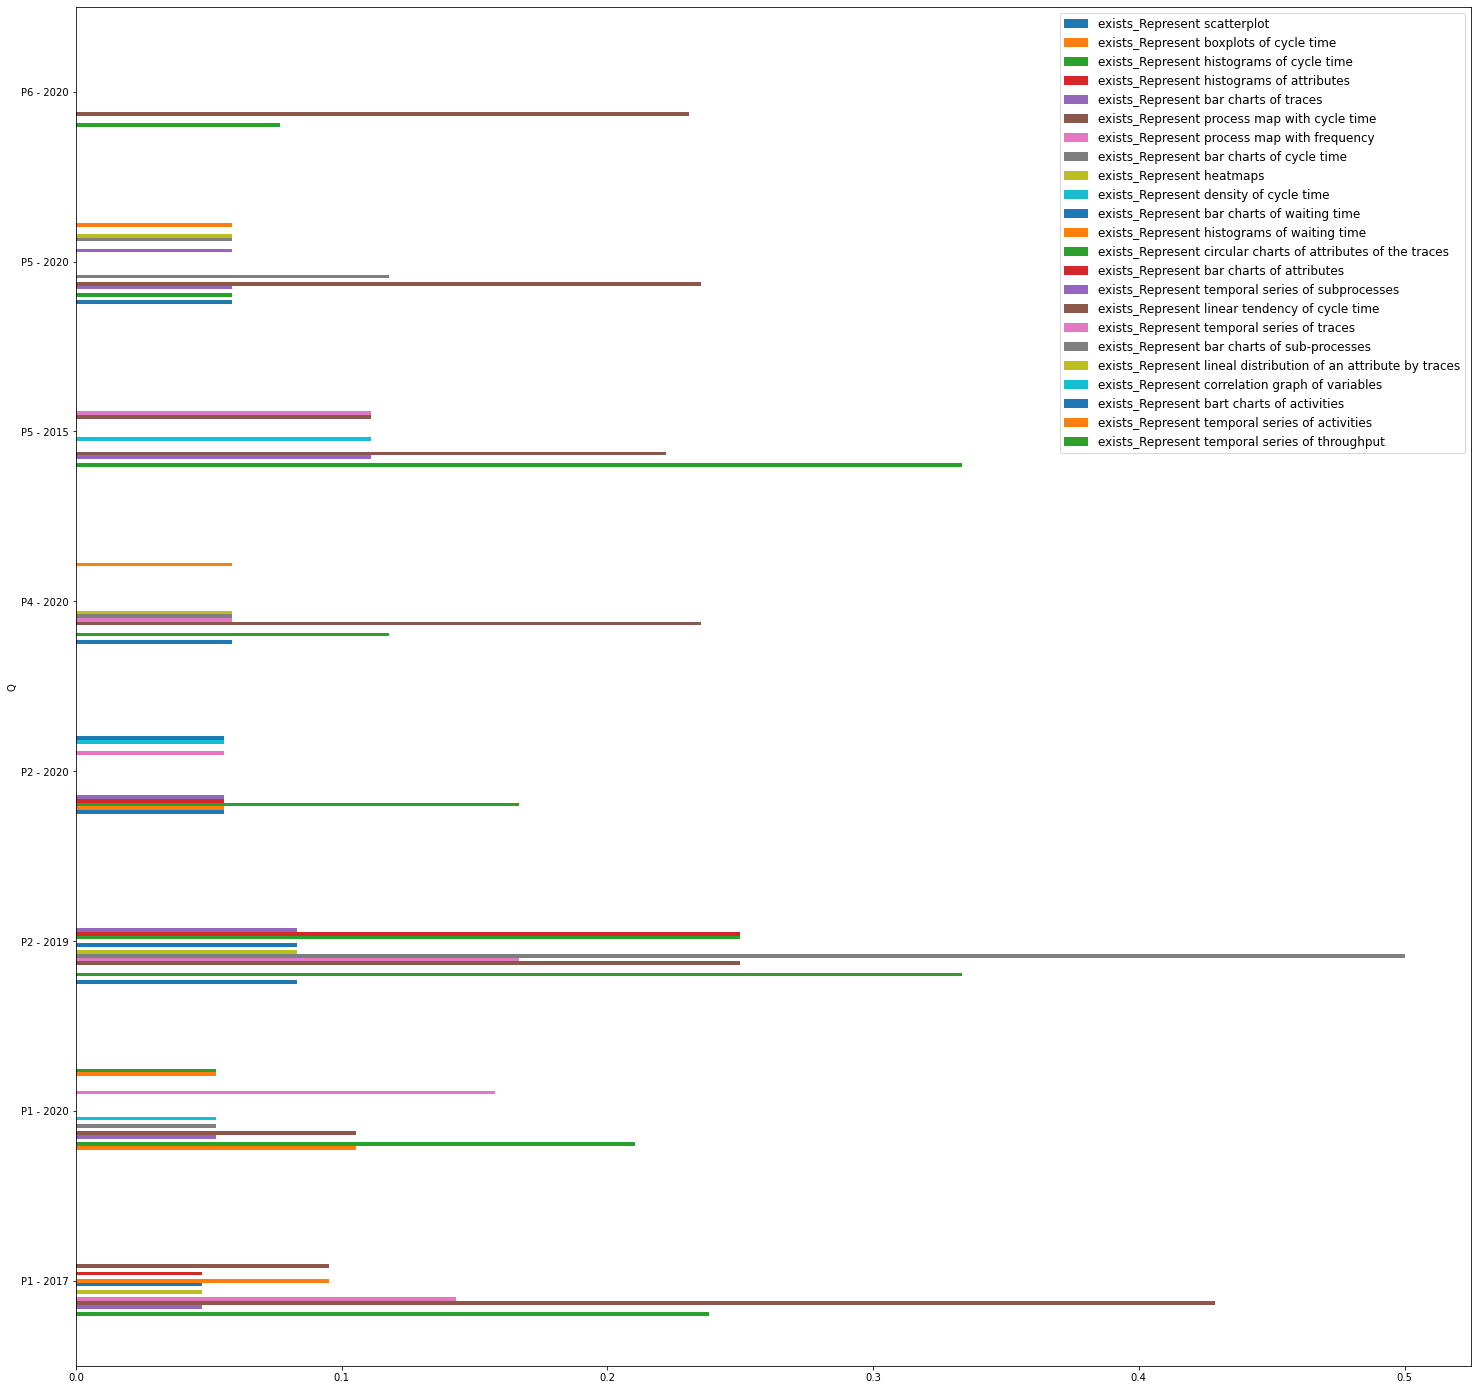

In [213]:


subset = specific[specific['concept:name']=='Calculate cycle time']['Specific operation']
s = distribution_set([s for s in repres])

c = ['exists_'+s for s in repres]
s.groupby('Q')[c].mean().plot(kind='barh', legend=True, figsize=(25,25)).legend(loc='best', fontsize=12)


In [378]:
df_prueba[df_prueba['concept:name']=='Group activities']['Specific operation'].unique()

array(['Group activities by sub-processes', 'Group activities by role',
       'Group activities by time', 'Group activities using clustering'],
      dtype=object)

In [339]:
df_prueba

case:concept:name               concept:name  \
0      A1 P2 BPI 2020       Calculate cycle time   
1      A1 P2 BPI 2020         Compare cycle time   
2      A2 P2 BPI 2020       Calculate cycle time   
3      A2 P2 BPI 2020         Compare cycle time   
4      A7 P2 BPI 2020       Calculate throughput   
..                ...                        ...   
943   A19 P1 BPI 2020               Group traces   
944   A19 P1 BPI 2020               Group traces   
945   A19 P1 BPI 2020       Calculate statistics   
946   A19 P1 BPI 2020       Calculate throughput   
947   A19 P1 BPI 2020  Represent temporal series   

                                    Specific operation  \
0    Calculate cycle time of the whole process for ...   
1                                   Compare cycle time   
2            Get cycle time from the previous question   
3                                   Compare cycle time   
4                                 Calculate throughput   
..                                                 ...   
943                               Group traces by year   
944                         Group traces by activities   
945                 Calculate Statistics of activities   
946                               Calculate throughput   
947            Represent temporal series of throughput   

                 time:timestamp Report Question  Year      Category  \
0    2021-10-19 12:47:13.651481     A1       P2  2020      Academic   
1    2021-10-19 12:47:13.659459     A1       P2  2020      Academic   
2    2021-10-19 12:47:13.666495     A2       P2  2020       Student   
3    2021-10-19 12:47:13.666495     A2       P2  2020       Student   
4    2021-10-19 12:47:13.682150     A7       P2  2020      Academic   
..                          ...    ...      ...   ...           ...   
943  2021-10-19 12:47:20.534786    A19       P1  2020  Professional   
944  2021-10-19 12:47:20.534786    A19       P1  2020  Professional   
945  2021-10-19 12:47:20.557196    A19       P1  2020  Professional   
946  2021-10-19 12:47:20.567144    A19       P1  2020  Professional   
947  2021-10-19 12:47:20.576118    A19       P1  2020  Professional   

                     Type    Tupla  \
0      Analyze Cycle Time   A12020   
1      Analyze Cycle Time   A12020   
2      Analyze Cycle Time   A22020   
3      Analyze Cycle Time   A22020   
4      Analyze Cycle Time   A72020   
..                    ...      ...   
943          Manipulation  A192020   
944          Manipulation  A192020   
945  Calculate statistics  A192020   
946    Analyze Cycle Time  A192020   
947        Representation  A192020   

                                          Organization prueba          Q  \
0                       Technische Universität, Berlin         P2 - 2020   
1                       Technische Universität, Berlin         P2 - 2020   
2               Faculty of Science, Utrecht University         P2 - 2020   
3               Faculty of Science, Utrecht University         P2 - 2020   
4    German Research Center for Artificial Intellig...         P2 - 2020   
..                                                 ...    ...        ...   
943                                           Sberbank         P1 - 2020   
944                                           Sberbank         P1 - 2020   
945                                           Sberbank         P1 - 2020   
946                                           Sberbank         P1 - 2020   
947                                           Sberbank         P1 - 2020   

      cond  cond2  
0     True  False  
1    False   True  
2     True  False  
3    False   True  
4    False  False  
..     ...    ...  
943  False  False  
944  False  False  
945  False  False  
946  False  False  
947  False  False  

[948 rows x 15 columns]

In [179]:
df_prueba['concept:name'] = df_prueba['Specific operation']

In [91]:
def list_agg(vals): 
    return [v for v in vals if v is not None]

# c_op =[s for s in specific if s.startswith('Calculate cycle ')]
# df_prueba.loc[df_prueba['Specific operation'].isin(c_op), 'opf'] = df_prueba['Specific operation']
# df_prueba.loc[~df_prueba['Specific operation'].isin(c_op), 'opf'] = None

df_prueba['opf'] = df_prueba['Specific operation']

df_base = df_prueba.groupby('case:concept:name').agg({'opf':list_agg, 'Report': 'first','Question': 'first', 'Year':'first', 'Type':'first', 'Organization':'first','Category':'first'})
df_base['Question'] = df_base['Question'] + "-" + df_base['Year']
df_base = df_base.drop(df_base[df_base['opf'].apply(lambda x: len(x) == 0)].index)
df_base

opf Report  \
case:concept:name                                                             
A1 P1 BPI 2017     [Calculate cycle time of the whole process for...     A1   
A1 P1 BPI 2020     [Filter traces by activities, Calculate cycle ...     A1   
A1 P2 BPI 2019     [Group events by time, Calculate cycle time of...     A1   
A1 P2 BPI 2020     [Calculate cycle time of the whole process for...     A1   
A1 P5 BPI 2015     [Calculate cycle time of the whole process for...     A1   
...                                                              ...    ...   
A8 P1 BPI 2017     [Filter traces by activities, Calculate waitin...     A8   
A8 P5 BPI 2015     [Calculate cycle time of the whole process for...     A8   
A9 P1 BPI 2017     [Calculate processing time, Calculate waiting ...     A9   
A9 P2 BPI 2019     [Filter traces by year, Calculate cycle time o...     A9   
A9 P5 BPI 2015     [Filter traces by activities, Calculate cycle ...     A9   

                  Question  Year                Type  \
case:concept:name                                      
A1 P1 BPI 2017     P1-2017  2017  Analyze Cycle Time   
A1 P1 BPI 2020     P1-2020  2020        Manipulation   
A1 P2 BPI 2019     P2-2019  2019        Manipulation   
A1 P2 BPI 2020     P2-2020  2020  Analyze Cycle Time   
A1 P5 BPI 2015     P5-2015  2015  Analyze Cycle Time   
...                    ...   ...                 ...   
A8 P1 BPI 2017     P1-2017  2017        Manipulation   
A8 P5 BPI 2015     P5-2015  2015  Analyze Cycle Time   
A9 P1 BPI 2017     P1-2017  2017  Analyze Cycle Time   
A9 P2 BPI 2019     P2-2019  2019        Manipulation   
A9 P5 BPI 2015     P5-2015  2015        Manipulation   

                                                        Organization  \
case:concept:name                                                      
A1 P1 BPI 2017     University of Liechtenstein\nVienna University...   
A1 P1 BPI 2020                        Technische Universität, Berlin   
A1 P2 BPI 2019                               University of Melbourne   
A1 P2 BPI 2020                        Technische Universität, Berlin   
A1 P5 BPI 2015           Meijer & Van der Ham Management Consultants   
...                                                              ...   
A8 P1 BPI 2017      Universidade Federal do Estado do Rio de Janeiro   
A8 P5 BPI 2015                                          GRADIENT ECM   
A9 P1 BPI 2017                                               POSTECH   
A9 P2 BPI 2019                                      KPMG Netherlands   
A9 P5 BPI 2015     APPS(Advanced Process Performance reSearch cen...   

                       Category  
case:concept:name                
A1 P1 BPI 2017          Student  
A1 P1 BPI 2020         Academic  
A1 P2 BPI 2019          Student  
A1 P2 BPI 2020         Academic  
A1 P5 BPI 2015     Professional  
...                         ...  
A8 P1 BPI 2017          Student  
A8 P5 BPI 2015     Professional  
A9 P1 BPI 2017          Student  
A9 P2 BPI 2019     Professional  
A9 P5 BPI 2015          Student  

[126 rows x 7 columns]

In [39]:
df_base['Question'].unique()

array(['P1-2017', 'P1-2020', 'P2-2019', 'P2-2020', 'P5-2015', 'P6-2020',
       'P4-2020', 'P5-2020'], dtype=object)

In [92]:
df_base['id']=df_base['Report']+df_base['Question']+df_base['Year']
df_pairs = df_base.merge(df_base, how='cross')
df_pairs = df_pairs.drop(df_pairs[df_pairs['id_x'] == df_pairs['id_y']].index)


In [93]:
df_pairs

opf_x Report_x Question_x  \
1      [Calculate cycle time of the whole process for...       A1    P1-2017   
2      [Calculate cycle time of the whole process for...       A1    P1-2017   
3      [Calculate cycle time of the whole process for...       A1    P1-2017   
4      [Calculate cycle time of the whole process for...       A1    P1-2017   
5      [Calculate cycle time of the whole process for...       A1    P1-2017   
...                                                  ...      ...        ...   
15870  [Filter traces by activities, Calculate cycle ...       A9    P5-2015   
15871  [Filter traces by activities, Calculate cycle ...       A9    P5-2015   
15872  [Filter traces by activities, Calculate cycle ...       A9    P5-2015   
15873  [Filter traces by activities, Calculate cycle ...       A9    P5-2015   
15874  [Filter traces by activities, Calculate cycle ...       A9    P5-2015   

      Year_x              Type_x  \
1       2017  Analyze Cycle Time   
2       2017  Analyze Cycle Time   
3       2017  Analyze Cycle Time   
4       2017  Analyze Cycle Time   
5       2017  Analyze Cycle Time   
...      ...                 ...   
15870   2015        Manipulation   
15871   2015        Manipulation   
15872   2015        Manipulation   
15873   2015        Manipulation   
15874   2015        Manipulation   

                                          Organization_x Category_x  \
1      University of Liechtenstein\nVienna University...    Student   
2      University of Liechtenstein\nVienna University...    Student   
3      University of Liechtenstein\nVienna University...    Student   
4      University of Liechtenstein\nVienna University...    Student   
5      University of Liechtenstein\nVienna University...    Student   
...                                                  ...        ...   
15870  APPS(Advanced Process Performance reSearch cen...    Student   
15871  APPS(Advanced Process Performance reSearch cen...    Student   
15872  APPS(Advanced Process Performance reSearch cen...    Student   
15873  APPS(Advanced Process Performance reSearch cen...    Student   
15874  APPS(Advanced Process Performance reSearch cen...    Student   

                id_x                                              opf_y  \
1      A1P1-20172017  [Filter traces by activities, Calculate cycle ...   
2      A1P1-20172017  [Group events by time, Calculate cycle time of...   
3      A1P1-20172017  [Calculate cycle time of the whole process for...   
4      A1P1-20172017  [Calculate cycle time of the whole process for...   
5      A1P1-20172017  [Get cycle time from the previous question, Id...   
...              ...                                                ...   
15870  A9P5-20152015  [Calculate cycle time for all pairs of events ...   
15871  A9P5-20152015  [Filter traces by activities, Calculate waitin...   
15872  A9P5-20152015  [Calculate cycle time of the whole process for...   
15873  A9P5-20152015  [Calculate processing time, Calculate waiting ...   
15874  A9P5-20152015  [Filter traces by year, Calculate cycle time o...   

      Report_y Question_y Year_y              Type_y  \
1           A1    P1-2020   2020        Manipulation   
2           A1    P2-2019   2019        Manipulation   
3           A1    P2-2020   2020  Analyze Cycle Time   
4           A1    P5-2015   2015  Analyze Cycle Time   
5           A1    P5-2020   2020  Analyze Cycle Time   
...        ...        ...    ...                 ...   
15870       A7    P6-2020   2020  Analyze Cycle Time   
15871       A8    P1-2017   2017        Manipulation   
15872       A8    P5-2015   2015  Analyze Cycle Time   
15873       A9    P1-2017   2017  Analyze Cycle Time   
15874       A9    P2-2019   2019        Manipulation   

                                          Organization_y    Category_y  \
1                         Technische Universität, Berlin      Academic   
2                                University of Melbourne       Student   
3       

In [149]:

df_pairs['combined'] = df_pairs.apply(lambda row: ''.join(sorted([row['id_x'], row['id_y']])), axis=1)
df_pairs = df_pairs.drop_duplicates('combined').reset_index(drop=True)
df_pairs['jaccard'] = df_pairs.apply(lambda row: jaccardIndex(row['opf_x'], row['opf_y']), axis=1)
df_pairs['sorensen'] = df_pairs.apply(lambda row: sorensenIndex(row['opf_x'], row['opf_y']), axis=1)
#df_pairs.groupby(['Question_x', 'Year_x', 'Question_y', 'Year_y']).mean()




In [123]:
df_pairsb = df_pairs.drop(df_pairs[df_pairs['jaccard']< 0.5].index)
g = nx.from_pandas_edgelist(df=df_pairsb, source='id_x', target='id_y', edge_attr='jaccard')


In [103]:
sum(df_pairs['jaccard'] > 0.25)

278

In [124]:
[len(c) for c in sorted(nx.connected_components(g), key=len, reverse=True)]

[20, 11, 2, 2, 2, 2, 2, 2, 2]

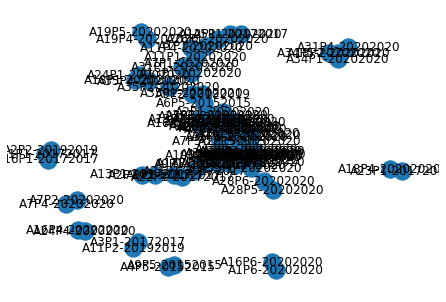

In [107]:
nx.draw(g, with_labels=True)

In [150]:
df_pairs['sorensen'].quantile([0.25, 0.5, 0.75, 0.90, 1])

0.25    0.000000
0.50    0.000000
0.75    0.166667
0.90    0.285714
1.00    1.000000
Name: sorensen, dtype: float64

In [151]:
df_pairs['sorensen'].mean()

0.09229229518147108

In [45]:
def fil(attrib, v1, v2):
    att_x = attrib+"_x"
    att_y = attrib+"_y"
    return (((df_pairs[att_x]==v1) & (df_pairs[att_y]==v2)) | ((df_pairs[att_x]==v2) & (df_pairs[att_y]==v1)))

In [46]:
years = df_pairs['Year_x'].unique()

for y in years:
    print(y, df_pairs[fil('Year', y, y)]['jaccard'].mean())

2017 0.08968253968253968
2020 0.14394208037825057
2019 0.1340909090909091
2015 0.21296296296296294


In [157]:
s_pairs=df_pairs['sorensen']

In [153]:
questions = df_pairs['Question_x'].unique()
gq = nx.Graph()
for q in questions:
    for q2 in questions:
        print(df_pairs[(df_pairs['Question_x']==q) & (df_pairs['Question_y']==q2)]['sorensen'])
        w = df_pairs[(df_pairs['Question_x']==q) & (df_pairs['Question_y']==q2)]['sorensen']
        w = df_pairs[fil('Question', q,q2)]['sorensen'].mean()
        c = df_pairs[fil('Question', q,q2)]['sorensen'].count()
        print(q,q2,w,c)
        if w > 0.09:            
            gq.add_edge(q, q2, weight=w)      


6       0.000000
13      0.100000
19      0.258065
26      0.125000
33      0.352941
          ...   
7792    0.352941
7794    0.300000
7815    0.333333
7817    0.400000
7866    0.363636
Name: sorensen, Length: 210, dtype: float64
P1-2017 P1-2017 0.21511077119274463 210
0       0.000000
7       0.285714
14      0.000000
20      0.000000
27      0.117647
          ...   
7071    0.100000
7084    0.300000
7744    0.000000
7786    0.333333
7809    0.000000
Name: sorensen, Length: 215, dtype: float64
P1-2017 P1-2020 0.09283915279254627 399
1       0.000000
8       0.133333
15      0.000000
21      0.166667
28      0.000000
          ...   
7753    0.000000
7795    0.095238
7818    0.000000
7867    0.000000
7872    0.000000
Name: sorensen, Length: 110, dtype: float64
P1-2017 P2-2019 0.11196854260306 252
2       0.166667
9       0.000000
16      0.000000
22      0.000000
29      0.153846
          ...   
7072    0.000000
7085    0.000000
7745    0.000000
7787    0.000000
7810    0.000000
Nam

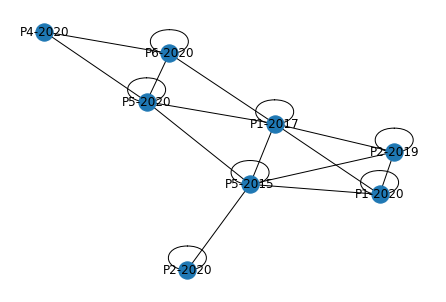

In [154]:
nx.draw(gq, with_labels=True)

In [155]:
nx.eigenvector_centrality(gq)

{'P1-2017': 0.504474548358047,
 'P1-2020': 0.3641988658193281,
 'P2-2019': 0.3641988658193281,
 'P5-2015': 0.47251340126779295,
 'P5-2020': 0.3788770027783751,
 'P6-2020': 0.2779679410470891,
 'P2-2020': 0.1283107998460379,
 'P4-2020': 0.14027568253871886}

17


DegreeView({'A1': 7, 'A12': 11, 'A13': 12, 'A2': 12, 'A25': 11, 'A26': 13, 'A30': 14, 'A7': 11, 'A10': 12, 'A11': 2, 'A28': 5, 'A37': 8, 'A35': 10, 'A16': 4, 'A18': 1, 'A19': 1})

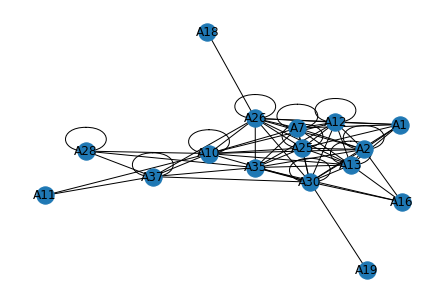

In [265]:
v = 'P5-2015'
b = df_pairs[fil('Question', 'P5-2020','P6-2020')][['jaccard', 'Report_x', 'Report_y']]
print (b['Report_x'].nunique())
b.loc[b.jaccard < 0.01, 'jaccard']=None
g5 = nx.Graph()

g5 = nx.from_pandas_edgelist(df=b.dropna(), source='Report_x', target='Report_y', edge_attr='jaccard')
nx.draw(g5, with_labels=True)
b.sort_values('jaccard', ascending=False).head(50)
g5.degree()


In [216]:
nx.eigenvector_centrality(g5)

{'A1': 0.15835848990088677,
 'A5': 0.20542258305497005,
 'A6': 0.4529911272713316,
 'A2': 0.2799723590205422,
 'A3': 0.27524459192752676,
 'A7': 0.4358247357773015,
 'A8': 0.428607222693793,
 'A4': 0.3752423050826682,
 'A9': 0.2427446050389366}

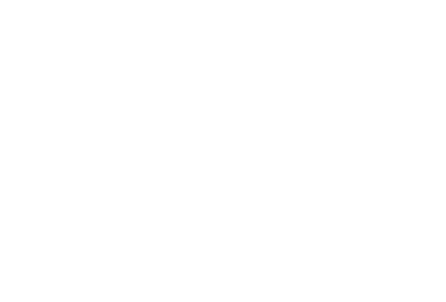

In [226]:
nx.draw(gq, with_labels=True, pos=nx.circular_layout(gq))

P1-2017 0.2748846418091221 420
P1-2020 0.23264670676951374 342
P2-2019 0.2946630031188855 132
P2-2020 0.23225587049116464 306
P5-2015 0.2593787385454053 72
P5-2020 0.35463979443758853 272
P6-2020 0.31992775742775736 156
P4-2020 0.14322893201569672 272


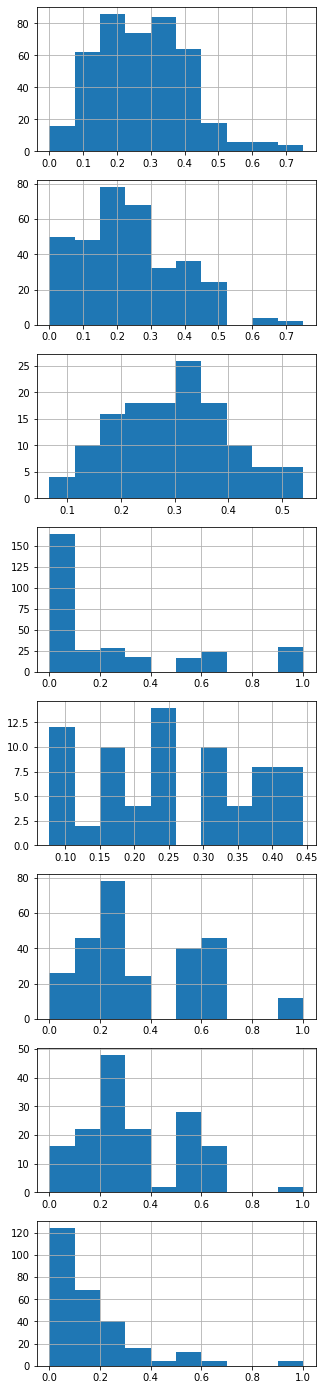

In [135]:
questions = df_pairs['Question_x'].unique()
fig, axs = plt.subplots(len(questions), figsize=(5, 25))
for n, q in enumerate(questions):
    print(q, df_pairs[fil('Question', q,q)]['jaccard'].mean(), df_pairs[fil('Question', q,q)]['jaccard'].count())
    df_pairs[fil('Question', q,q)]['jaccard'].hist(ax=axs[n])

# From here on is from a previous version

In [11]:
def overlapIndex(list1,list2):
    set1=set(list1)
    set2=set(list2)
    intersection = set1.intersection(set2)
    len1=len(list(set1))
    len2=len(list(set2))
#     print(float(len(list(intersection))))
#     print(min([len1,len2]))
    overlapIndex=float(len(list(intersection)))/min([len1,len2])
    return overlapIndex

In [30]:
def jaccardIndex(list1,list2):
    set1=set(list1)
    set2=set(list2)
    intersection = set1.intersection(set2)
    tamIntersection=len(list(intersection))
    union = set1.union(set2)
    tamUnion=len(list(union))
#     print("similitud: "+str(float(tamIntersection)/tamUnion))
    return float(tamIntersection)/tamUnion

In [148]:
def sorensenIndex(list1,list2):
    set1=set(list1)
    set2=set(list2)
    intersection = set1.intersection(set2)
    len1=len(list(set1))
    len2=len(list(set2))
    sorensenIndex=float(2*len(list(intersection)))/(len1+len2)
    return sorensenIndex

In [14]:
df2 = df_agrupado.groupby(by=['Year', 'Question'])
columns=['analisis','question','overlap', 'jaccard', 'sorensen']
df_metricas_preguntas = pd.DataFrame(columns=columns)

for name, group in df2:
#     print(name[1])
    for i in range(len(group)):
#         if(group.iloc[i]['Organization'] != 'Sberbank'):
#             org1 = 'No_Sberbank'
#         else:
#             org1 = 'Sberbank'
        
        for j in range(i+1,len(group)):
            grupo = group.iloc[i]['Operations']
            analisis = group.iloc[i]['case:concept:name'] + "-" + group.iloc[j]['case:concept:name']
                
#             if(group.iloc[j]['Organization'] != 'Sberbank'):
#                 org2 = 'No_Sberbank'
#             else:
#                 org2 = 'Sberbank'
#             org = org1 + "-" + org2
            question = name[1] + name[0]
            sorensen = sorensenIndex(grupo,group.iloc[j]['Operations'])
            overlap = overlapIndex(grupo,group.iloc[j]['Operations'])
            jaccard = jaccardIndex(grupo,group.iloc[j]['Operations'])
            new_row={'analisis':analisis, 'question':question, 'overlap': overlap, 'jaccard':jaccard, 'sorensen':sorensen} 
            df_metricas_preguntas = df_metricas_preguntas.append(new_row, ignore_index=True)

In [16]:
df_metricas_preguntas

analisis question   overlap   jaccard  sorensen
0      A1 P5 BPI 2015-A2 P5 BPI 2015   P52015  0.250000  0.090909  0.166667
1      A1 P5 BPI 2015-A3 P5 BPI 2015   P52015  0.166667  0.076923  0.142857
2      A1 P5 BPI 2015-A4 P5 BPI 2015   P52015  0.250000  0.090909  0.166667
3      A1 P5 BPI 2015-A5 P5 BPI 2015   P52015  0.571429  0.363636  0.533333
4      A1 P5 BPI 2015-A6 P5 BPI 2015   P52015  0.428571  0.250000  0.400000
..                               ...      ...       ...       ...       ...
981  A30 P6 BPI 2020-A37 P6 BPI 2020   P62020  0.333333  0.142857  0.250000
982   A30 P6 BPI 2020-A7 P6 BPI 2020   P62020  0.666667  0.500000  0.666667
983  A35 P6 BPI 2020-A37 P6 BPI 2020   P62020  0.000000  0.000000  0.000000
984   A35 P6 BPI 2020-A7 P6 BPI 2020   P62020  0.500000  0.250000  0.400000
985   A37 P6 BPI 2020-A7 P6 BPI 2020   P62020  0.333333  0.142857  0.250000

[986 rows x 5 columns]

In [ ]:
estadisticas = df_metricas_preguntas.groupby(by=['question']).mean()
estadisticas

overlap   jaccard  sorensen
question                              
P12017    0.558486  0.274885  0.414164
P12020    0.492063  0.232647  0.352898
P22019    0.582640  0.294663  0.445384
P22020    0.394662  0.232256  0.285560
P42020    0.344258  0.143229  0.213281
P52015    0.480655  0.259379  0.399029
P52020    0.654631  0.354640  0.476827
P62020    0.597009  0.319928  0.449758

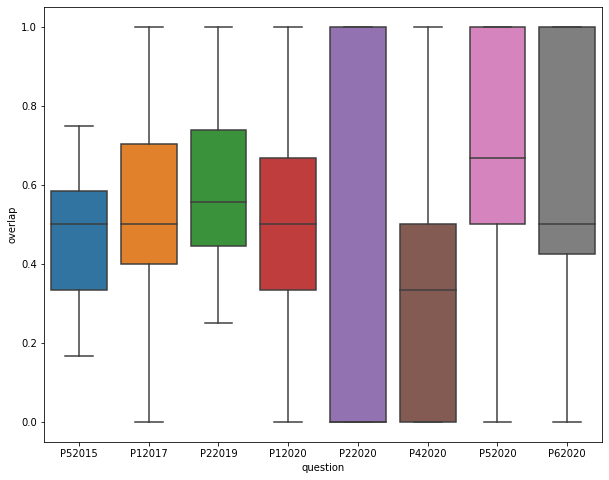

In [ ]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10, 8)
ax = sns.boxplot(x="question", y="overlap", data=df_metricas_preguntas)

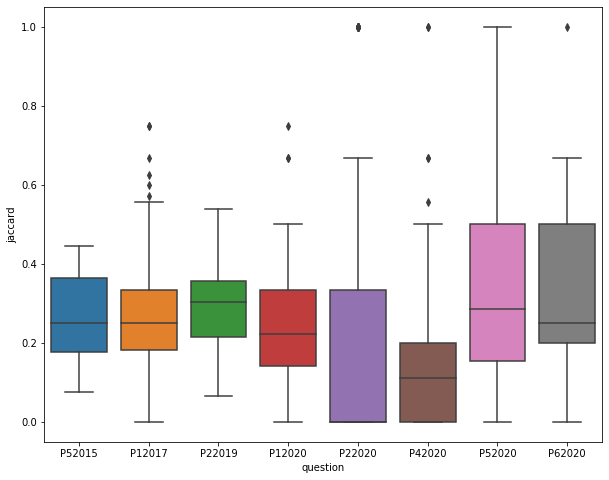

In [ ]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10, 8)
ax = sns.boxplot(x="question", y="jaccard", data=df_metricas_preguntas)

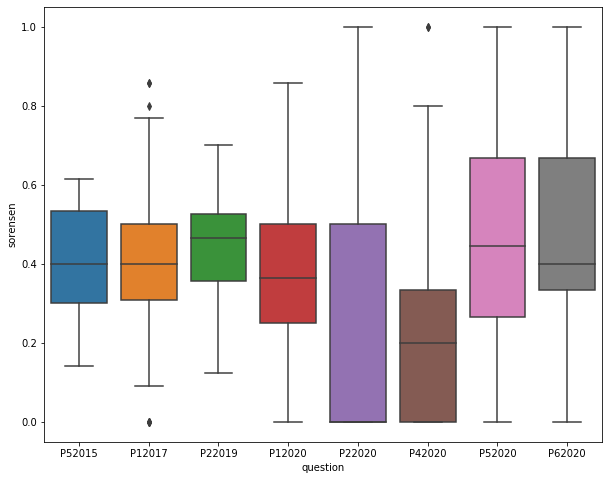

In [ ]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10, 8)
ax = sns.boxplot(x="question", y="sorensen", data=df_metricas_preguntas)

In [ ]:
df_metricas_preguntas.groupby(by=['question'])['overlap'].var(ddof=0)

question
P12017    0.050370
P12020    0.091253
P22019    0.039969
P22020    0.195602
P42020    0.145853
P52015    0.031217
P52020    0.096569
P62020    0.098267
Name: overlap, dtype: float64

In [ ]:
df_metricas_preguntas.groupby(by=['question'])['overlap'].std(ddof=0)

question
P12017    0.224433
P12020    0.302081
P22019    0.199922
P22020    0.442269
P42020    0.381907
P52015    0.176684
P52020    0.310756
P62020    0.313476
Name: overlap, dtype: float64

In [ ]:
df_metricas_preguntas.groupby(by=['question'])['jaccard'].var(ddof=0)

question
P12017    0.018178
P12020    0.023376
P22019    0.010497
P22020    0.105758
P42020    0.034494
P52015    0.012649
P52020    0.061416
P62020    0.041510
Name: jaccard, dtype: float64

In [ ]:
df_metricas_preguntas.groupby(by=['question'])['jaccard'].std(ddof=0)

question
P12017    0.134824
P12020    0.152892
P22019    0.102453
P22020    0.325204
P42020    0.185724
P52015    0.112468
P52020    0.247823
P62020    0.203740
Name: jaccard, dtype: float64

In [ ]:
df_metricas_preguntas.groupby(by=['question'])['sorensen'].var(ddof=0)

question
P12017    0.026660
P12020    0.040301
P22019    0.015537
P22020    0.124199
P42020    0.055338
P52015    0.020958
P52020    0.068057
P62020    0.053474
Name: sorensen, dtype: float64

In [ ]:
df_metricas_preguntas.groupby(by=['question'])['sorensen'].std(ddof=0)

question
P12017    0.163280
P12020    0.200751
P22019    0.124647
P22020    0.352419
P42020    0.235239
P52015    0.144770
P52020    0.260877
P62020    0.231245
Name: sorensen, dtype: float64

(array([78.,  0.,  1.,  6.,  0., 18.,  2.,  0.,  1., 47.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

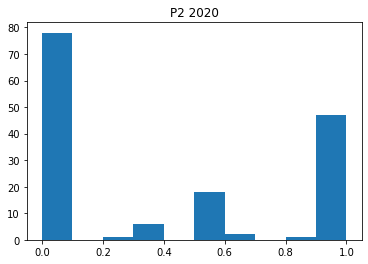

In [ ]:
plt.title('P2 2020')
plt.hist(df_overlap_preguntas[df_overlap_preguntas['question']=='P22020']['overlap'])

In [ ]:
df_overlap_preguntas[df_overlap_preguntas['question']=='P22020'].head(60)

analisis question  overlap
483   A1 P2 BPI 2020-A10 P2 BPI 2020   P22020      0.5
484   A1 P2 BPI 2020-A11 P2 BPI 2020   P22020      1.0
485   A1 P2 BPI 2020-A12 P2 BPI 2020   P22020      0.0
486   A1 P2 BPI 2020-A13 P2 BPI 2020   P22020      1.0
487   A1 P2 BPI 2020-A16 P2 BPI 2020   P22020      0.0
488   A1 P2 BPI 2020-A18 P2 BPI 2020   P22020      0.0
489    A1 P2 BPI 2020-A2 P2 BPI 2020   P22020      1.0
490   A1 P2 BPI 2020-A24 P2 BPI 2020   P22020      0.0
491   A1 P2 BPI 2020-A25 P2 BPI 2020   P22020      1.0
492   A1 P2 BPI 2020-A26 P2 BPI 2020   P22020      1.0
493   A1 P2 BPI 2020-A27 P2 BPI 2020   P22020      0.0
494   A1 P2 BPI 2020-A28 P2 BPI 2020   P22020      1.0
495   A1 P2 BPI 2020-A30 P2 BPI 2020   P22020      0.5
496   A1 P2 BPI 2020-A31 P2 BPI 2020   P22020      1.0
497   A1 P2 BPI 2020-A35 P2 BPI 2020   P22020      1.0
498   A1 P2 BPI 2020-A37 P2 BPI 2020   P22020      1.0
499    A1 P2 BPI 2020-A7 P2 BPI 2020   P22020      0.0
500  A10 P2 BPI 2020-A11 P2 BPI 2020   P22020      0.5
501  A10 P2 BPI 2020-A12 P2 BPI 2020   P22020      0.0
502  A10 P2 BPI 2020-A13 P2 BPI 2020   P22020      0.5
503  A10 P2 BPI 2020-A16 P2 BPI 2020   P22020      0.0
504  A10 P2 BPI 2020-A18 P2 BPI 2020   P22020      0.0
505   A10 P2 BPI 2020-A2 P2 BPI 2020   P22020      0.5
506  A10 P2 BPI 2020-A24 P2 BPI 2020   P22020      0.0
507  A10 P2 BPI 2020-A25 P2 BPI 2020   P22020      0.5
508  A10 P2 BPI 2020-A26 P2 BPI 2020   P22020      0.5
509  A10 P2 BPI 2020-A27 P2 BPI 2020   P22020      0.0
510  A10 P2 BPI 2020-A28 P2 BPI 2020   P22020      0.5
511  A10 P2 BPI 2020-A30 P2 BPI 2020   P22020      0.0
512  A10 P2 BPI 2020-A31 P2 BPI 2020   P22020      1.0
513  A10 P2 BPI 2020-A35 P2 BPI 2020   P22020      0.5
514  A10 P2 BPI 2020-A37 P2 BPI 2020   P22020      0.5
515   A10 P2 BPI 2020-A7 P2 BPI 2020   P22020      0.0
516  A11 P2 BPI 2020-A12 P2 BPI 2020   P22020      0.0
517  A11 P2 BPI 2020-A13 P2 BPI 2020   P22020      1.0
518  A11 P2 BPI 2020-A16 P2 BPI 2020   P22020      0.0
519  A11 P2 BPI 2020-A18 P2 BPI 2020   P22020      0.0
520   A11 P2 BPI 2020-A2 P2 BPI 2020   P22020      1.0
521  A11 P2 BPI 2020-A24 P2 BPI 2020   P22020      0.0
522  A11 P2 BPI 2020-A25 P2 BPI 2020   P22020      1.0
523  A11 P2 BPI 2020-A26 P2 BPI 2020   P22020      1.0
524  A11 P2 BPI 2020-A27 P2 BPI 2020   P22020      0.0
525  A11 P2 BPI 2020-A28 P2 BPI 2020   P22020      1.0
526  A11 P2 BPI 2020-A30 P2 BPI 2020   P22020      0.5
527  A11 P2 BPI 2020-A31 P2 BPI 2020   P22020      1.0
528  A11 P2 BPI 2020-A35 P2 BPI 2020   P22020      1.0
529  A11 P2 BPI 2020-A37 P2 BPI 2020   P22020      1.0
530   A11 P2 BPI 2020-A7 P2 BPI 2020   P22020      0.0
531  A12 P2 BPI 2020-A13 P2 BPI 2020   P22020      0.0
532  A12 P2 BPI 2020-A16 P2 BPI 2020   P22020      0.0
533  A12 P2 BPI 2020-A18 P2 BPI 2020   P22020      0.0
534   A12 P2 BPI 2020-A2 P2 BPI 2020   P22020      0.0
535  A12 P2 BPI 2020-A24 P2 BPI 2020   P22020      0.0
536  A12 P2 BPI 2020-A25 P2 BPI 2020   P22020      0.0
537  A12 P2 BPI 2020-A26 P2 BPI 2020   P22020      0.0
538  A12 P2 BPI 2020-A27 P2 BPI 2020   P22020      0.0
539  A12 P2 BPI 2020-A28 P2 BPI 2020   P22020      0.0
540  A12 P2 BPI 2020-A30 P2 BPI 2020   P22020      0.0
541  A12 P2 BPI 2020-A31 P2 BPI 2020   P22020      0.0
542  A12 P2 BPI 2020-A35 P2 BPI 2020   P22020      0.0

In [ ]:
df_p2 = df_prueba[df_prueba['Question']=='P2']
df_p2_2020 = df_p2[df_p2['Year']=='2020']
df_p2_2020.groupby('case:concept:name')['concept:name'].count()

case:concept:name
A1 P2 BPI 2020      2
A10 P2 BPI 2020     2
A11 P2 BPI 2020     2
A12 P2 BPI 2020     3
A13 P2 BPI 2020     3
A16 P2 BPI 2020     7
A18 P2 BPI 2020     1
A2 P2 BPI 2020      2
A24 P2 BPI 2020     3
A25 P2 BPI 2020     3
A26 P2 BPI 2020     2
A27 P2 BPI 2020     2
A28 P2 BPI 2020     3
A30 P2 BPI 2020    11
A31 P2 BPI 2020     1
A35 P2 BPI 2020    12
A37 P2 BPI 2020     2
A7 P2 BPI 2020      4
Name: concept:name, dtype: int64

(array([60.,  0.,  7., 23.,  2., 11.,  5.,  0.,  1., 27.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

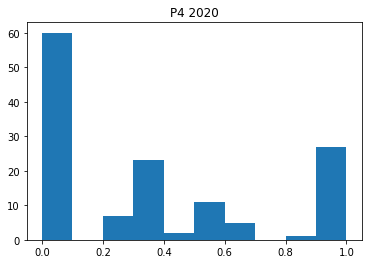

In [ ]:
plt.title('P4 2020')
plt.hist(df_overlap_preguntas[df_overlap_preguntas['question']=='P42020']['overlap'])

In [ ]:
df_overlap_preguntas[df_overlap_preguntas['question']=='P42020'].head(60)

analisis question   overlap
636  A10 P4 BPI 2020-A11 P4 BPI 2020   P42020  0.000000
637  A10 P4 BPI 2020-A12 P4 BPI 2020   P42020  1.000000
638  A10 P4 BPI 2020-A13 P4 BPI 2020   P42020  1.000000
639  A10 P4 BPI 2020-A16 P4 BPI 2020   P42020  1.000000
640  A10 P4 BPI 2020-A18 P4 BPI 2020   P42020  1.000000
641  A10 P4 BPI 2020-A19 P4 BPI 2020   P42020  0.000000
642   A10 P4 BPI 2020-A2 P4 BPI 2020   P42020  0.500000
643  A10 P4 BPI 2020-A24 P4 BPI 2020   P42020  1.000000
644  A10 P4 BPI 2020-A25 P4 BPI 2020   P42020  0.500000
645  A10 P4 BPI 2020-A26 P4 BPI 2020   P42020  0.000000
646  A10 P4 BPI 2020-A27 P4 BPI 2020   P42020  0.000000
647  A10 P4 BPI 2020-A28 P4 BPI 2020   P42020  0.500000
648  A10 P4 BPI 2020-A31 P4 BPI 2020   P42020  0.000000
649  A10 P4 BPI 2020-A35 P4 BPI 2020   P42020  0.500000
650  A10 P4 BPI 2020-A37 P4 BPI 2020   P42020  1.000000
651   A10 P4 BPI 2020-A7 P4 BPI 2020   P42020  0.000000
652  A11 P4 BPI 2020-A12 P4 BPI 2020   P42020  0.000000
653  A11 P4 BPI 2020-A13 P4 BPI 2020   P42020  0.000000
654  A11 P4 BPI 2020-A16 P4 BPI 2020   P42020  0.400000
655  A11 P4 BPI 2020-A18 P4 BPI 2020   P42020  0.000000
656  A11 P4 BPI 2020-A19 P4 BPI 2020   P42020  0.200000
657   A11 P4 BPI 2020-A2 P4 BPI 2020   P42020  0.000000
658  A11 P4 BPI 2020-A24 P4 BPI 2020   P42020  0.200000
659  A11 P4 BPI 2020-A25 P4 BPI 2020   P42020  0.000000
660  A11 P4 BPI 2020-A26 P4 BPI 2020   P42020  0.000000
661  A11 P4 BPI 2020-A27 P4 BPI 2020   P42020  0.333333
662  A11 P4 BPI 2020-A28 P4 BPI 2020   P42020  0.000000
663  A11 P4 BPI 2020-A31 P4 BPI 2020   P42020  0.000000
664  A11 P4 BPI 2020-A35 P4 BPI 2020   P42020  0.400000
665  A11 P4 BPI 2020-A37 P4 BPI 2020   P42020  0.000000
666   A11 P4 BPI 2020-A7 P4 BPI 2020   P42020  0.500000
667  A12 P4 BPI 2020-A13 P4 BPI 2020   P42020  1.000000
668  A12 P4 BPI 2020-A16 P4 BPI 2020   P42020  1.000000
669  A12 P4 BPI 2020-A18 P4 BPI 2020   P42020  1.000000
670  A12 P4 BPI 2020-A19 P4 BPI 2020   P42020  0.000000
671   A12 P4 BPI 2020-A2 P4 BPI 2020   P42020  1.000000
672  A12 P4 BPI 2020-A24 P4 BPI 2020   P42020  1.000000
673  A12 P4 BPI 2020-A25 P4 BPI 2020   P42020  1.000000
674  A12 P4 BPI 2020-A26 P4 BPI 2020   P42020  0.000000
675  A12 P4 BPI 2020-A27 P4 BPI 2020   P42020  0.000000
676  A12 P4 BPI 2020-A28 P4 BPI 2020   P42020  1.000000
677  A12 P4 BPI 2020-A31 P4 BPI 2020   P42020  0.000000
678  A12 P4 BPI 2020-A35 P4 BPI 2020   P42020  1.000000
679  A12 P4 BPI 2020-A37 P4 BPI 2020   P42020  1.000000
680   A12 P4 BPI 2020-A7 P4 BPI 2020   P42020  0.000000
681  A13 P4 BPI 2020-A16 P4 BPI 2020   P42020  0.666667
682  A13 P4 BPI 2020-A18 P4 BPI 2020   P42020  1.000000
683  A13 P4 BPI 2020-A19 P4 BPI 2020   P42020  0.000000
684   A13 P4 BPI 2020-A2 P4 BPI 2020   P42020  0.666667
685  A13 P4 BPI 2020-A24 P4 BPI 2020   P42020  0.666667
686  A13 P4 BPI 2020-A25 P4 BPI 2020   P42020  0.333333
687  A13 P4 BPI 2020-A26 P4 BPI 2020   P42020  0.000000
688  A13 P4 BPI 2020-A27 P4 BPI 2020   P42020  0.333333
689  A13 P4 BPI 2020-A28 P4 BPI 2020   P42020  0.333333
690  A13 P4 BPI 2020-A31 P4 BPI 2020   P42020  0.000000
691  A13 P4 BPI 2020-A35 P4 BPI 2020   P42020  0.333333
692  A13 P4 BPI 2020-A37 P4 BPI 2020   P42020  1.000000
693   A13 P4 BPI 2020-A7 P4 BPI 2020   P42020  0.333333
694  A16 P4 BPI 2020-A18 P4 BPI 2020   P42020  1.000000
695  A16 P4 BPI 2020-A19 P4 BPI 2020   P42020  0.285714

In [ ]:
df_p4 = df_prueba[df_prueba['Question']=='P4']
df_p4_2020 = df_p4[df_p4['Year']=='2020']
df_p4_2020.groupby('case:concept:name')['concept:name'].count()

case:concept:name
A10 P4 BPI 2020     2
A11 P4 BPI 2020     8
A12 P4 BPI 2020     1
A13 P4 BPI 2020     4
A16 P4 BPI 2020    10
A18 P4 BPI 2020     2
A19 P4 BPI 2020    18
A2 P4 BPI 2020      3
A24 P4 BPI 2020    10
A25 P4 BPI 2020     3
A26 P4 BPI 2020     2
A27 P4 BPI 2020     3
A28 P4 BPI 2020    10
A31 P4 BPI 2020     2
A35 P4 BPI 2020     8
A37 P4 BPI 2020     1
A7 P4 BPI 2020      5
Name: concept:name, dtype: int64

In [ ]:
df_p4[df_p4['Tupla']=='A102020']

case:concept:name           concept:name  \
47   A10 P4 BPI 2020  Represent process map   
48   A10 P4 BPI 2020   Calculate cycle time   

                                   Specific operation  \
47              Represent process map with cycle time   
48  Calculate cycle time for all pairs of events f...   

                time:timestamp Report Question  Year  Category  \
47  2021-10-19 12:47:13.996946    A10       P4  2020  Academic   
48  2021-10-19 12:47:13.996946    A10       P4  2020  Academic   

                  Type    Tupla                              Organization  \
47      Representation  A102020  Internal Audit Department, Rostov-on-Don   
48  Analyze Cycle Time  A102020  Internal Audit Department, Rostov-on-Don   

   prueba  
47         
48

In [ ]:
df_p4[df_p4['Tupla']=='A122020']

case:concept:name          concept:name  \
49   A12 P4 BPI 2020  Calculate cycle time   

                                   Specific operation  \
49  Calculate cycle time for all pairs of events f...   

                time:timestamp Report Question  Year      Category  \
49  2021-10-19 12:47:13.996946    A12       P4  2020  Professional   

                  Type    Tupla Organization prueba  
49  Analyze Cycle Time  A122020     Sberbank

(array([12.,  0.,  2., 15.,  0., 22., 37.,  0.,  1., 47.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

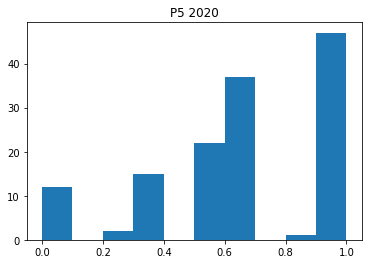

In [ ]:
plt.title('P5 2020')
plt.hist(df_overlap_preguntas[df_overlap_preguntas['question']=='P52020']['overlap'])

(array([ 8.,  0.,  0., 11.,  1., 23., 12.,  0.,  0., 23.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

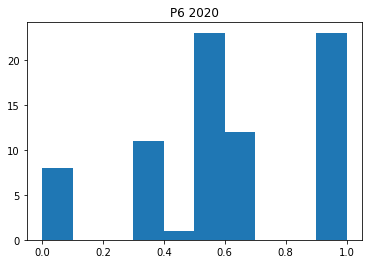

In [ ]:
plt.title('P6 2020')
plt.hist(df_overlap_preguntas[df_overlap_preguntas['question']=='P62020']['overlap'])